In [18]:
import matplotlib.pyplot as plt
import matplotlib.dates
from datetime import datetime
import pandas as pd
import numpy as np
import os

from neuralhydrology.evaluation.metrics import calculate_metrics


In [2]:
inflow_extremes = pd.read_csv('figures_for_usace_writeup/data/inflow_extremes_test.csv')
inflow_standard = pd.read_csv('figures_for_usace_writeup/data/inflow_standard_test.csv')
mf_tuler_swe_extremes = pd.read_csv('figures_for_usace_writeup/data/MF_Tuler_S20_SWE_extremes_test.csv')
mf_tuler_swe_standard = pd.read_csv('figures_for_usace_writeup/data/MF_Tuler_S20_SWE_standard_test.csv')
nf_tuler_swe_extremes = pd.read_csv('figures_for_usace_writeup/data/NF_Tuler_S10_SWE_extremes_test.csv')
nf_tuler_swe_standard = pd.read_csv('figures_for_usace_writeup/data/NF_Tuler_S10_SWE_standard_test.csv')
sf_tuler_swe_extremes = pd.read_csv('figures_for_usace_writeup/data/SF_Tuler_S10_SWE_extremes_test.csv')
sf_tuler_swe_standard = pd.read_csv('figures_for_usace_writeup/data/SF_Tuler_S10_SWE_standard_test.csv')

desired_metrics = ['nse', 'alpha-nse', 'beta-nse', 'pearson-r', 'percent_bias', 'fhv', 'fms', 'flv']

### SWE 1a, 1b, 1c, inflow 1 (timeseries plot, done for SWE)

#### SWE

In [154]:
def plt_timeseries(data: pd.DataFrame, basin_name: str, nse: list, perc_bias: list, alpha_nse:list, beta_nse:list, r:list, fhv, fms, flv):

    ######################### PROCESS DATA #########################

    data['DateTime'] = pd.to_datetime(data['DateTime'])

    dates = data['DateTime']
    obs = data['Observed']
    hms = data['HMS']
    lstm = data['LSTM']
    lstm_hms = data['LSTM_HMS']

    ######################### CALCULATE METRICS #########################

    hms_metrics = calculate_metrics(obs.to_xarray(), hms.to_xarray(), desired_metrics)
    lstm_metrics = calculate_metrics(obs.to_xarray(), lstm.to_xarray(), desired_metrics)
    lstm_hms_metrics = calculate_metrics(obs.to_xarray(), lstm_hms.to_xarray(), desired_metrics)

    nse += [hms_metrics['NSE'], lstm_metrics["NSE"], lstm_hms_metrics["NSE"]]
    perc_bias += [hms_metrics['percent_bias'], lstm_metrics["percent_bias"], lstm_hms_metrics["percent_bias"]]
    alpha_nse += [hms_metrics['Alpha-NSE'], lstm_metrics["Alpha-NSE"], lstm_hms_metrics["Alpha-NSE"]]
    beta_nse += [hms_metrics['Beta-NSE'], lstm_metrics["Beta-NSE"], lstm_hms_metrics["Beta-NSE"]]
    r += [hms_metrics['Pearson-r'], lstm_metrics["Pearson-r"], lstm_hms_metrics["Pearson-r"]]
    fhv += [hms_metrics['FHV'], lstm_metrics["FHV"], lstm_hms_metrics["FHV"]]
    fms += [hms_metrics['FMS'], lstm_metrics["FMS"], lstm_hms_metrics["FMS"]]
    flv += [hms_metrics['FLV'], lstm_metrics["FLV"], lstm_hms_metrics["FLV"]]

    ######################### PLOTTING #########################
    
    plt.figure(figsize=(16, 3))

    plt.plot(dates, obs, linewidth=0.5, label='Observed', color='black')
    plt.plot(dates, hms, linewidth=0.5, label=f'HMS (NSE: {round(hms_metrics["NSE"], 3)})', color='red')
    plt.plot(dates, lstm, linewidth=0.5, label=f'LSTM (NSE: {round(lstm_metrics["NSE"], 3)})', color='blue')
    plt.plot(dates, lstm_hms, linewidth=0.5, label=f'PILSTM (NSE: {round(lstm_hms_metrics["NSE"], 3)})', color='green')

    plt.xlabel("Year", fontsize=14)
    plt.ylabel("Daily SWE (inches)", fontsize=14)
    title = f'Observed and Predicted Daily SWE (inches) Over Time in {basin_name}'
    plt.title(title, fontsize=14)
    plt.legend(fontsize=12, loc='upper right');

    directory = './figures_for_usace_writeup/figures1/normal_test/SWE/'
    file_path = os.path.join(directory, title + '.png')
    os.makedirs(directory, exist_ok=True)
    plt.savefig(file_path, bbox_inches='tight')
    plt.show();

    return nse, perc_bias, alpha_nse, beta_nse, r, fhv, fms, flv

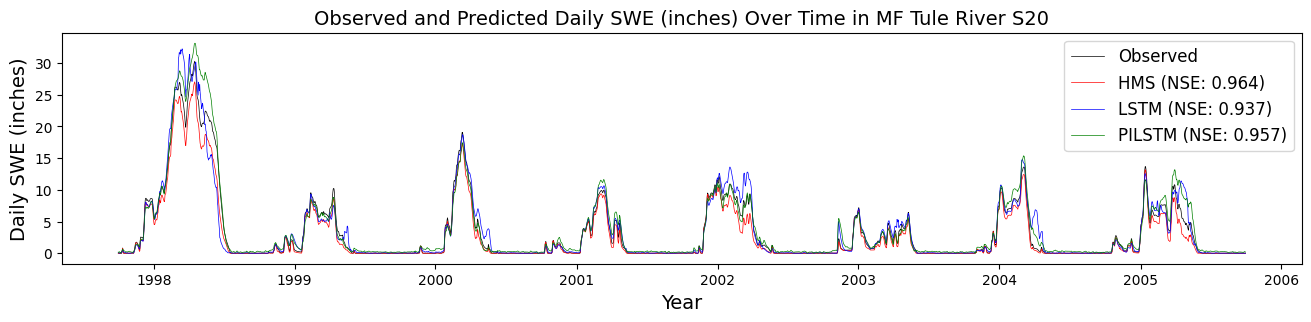

/Users/evanrobert/anaconda3/envs/lstm/lib/python3.10/site-packages/neuralhydrology/evaluation/metrics.py:412: RuntimeWarning: invalid value encountered in log
  qom_upper = np.log(obs[np.round(upper * len(obs)).astype(int)])
/Users/evanrobert/anaconda3/envs/lstm/lib/python3.10/site-packages/neuralhydrology/evaluation/metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)
/Users/evanrobert/anaconda3/envs/lstm/lib/python3.10/site-packages/neuralhydrology/evaluation/metrics.py:412: RuntimeWarning: invalid value encountered in log
  qom_upper = np.log(obs[np.round(upper * len(obs)).astype(int)])
/Users/evanrobert/anaconda3/envs/lstm/lib/python3.10/site-packages/neuralhydrology/evaluation/metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)
/Users/evanrobert/anaconda3/envs/lstm/lib/python3.10/site-packages/neuralhydrology/evaluation/metrics.py:412: RuntimeWarning: invalid value encountered in log
  qom_upper = np.log(obs[np.round

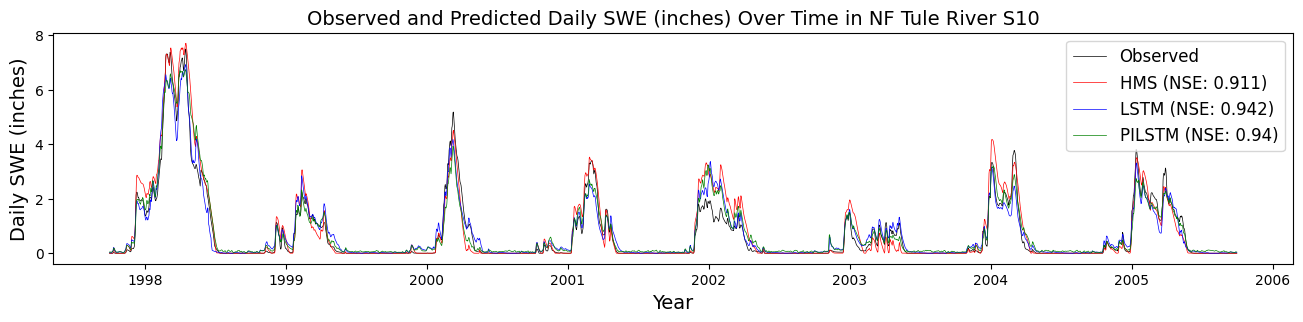

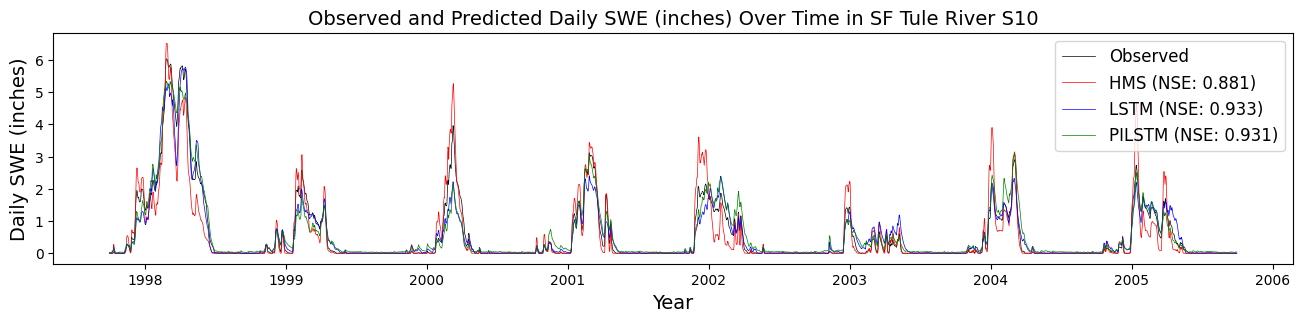

In [155]:
### SWE

inflow_extremes = pd.read_csv('figures_for_usace_writeup/data/inflow_extremes_test.csv')
inflow_standard = pd.read_csv('figures_for_usace_writeup/data/inflow_standard_test.csv')
mf_tuler_swe_extremes = pd.read_csv('figures_for_usace_writeup/data/MF_Tuler_S20_SWE_extremes_test.csv')
mf_tuler_swe_standard = pd.read_csv('figures_for_usace_writeup/data/MF_Tuler_S20_SWE_standard_test.csv')
nf_tuler_swe_extremes = pd.read_csv('figures_for_usace_writeup/data/NF_Tuler_S10_SWE_extremes_test.csv')
nf_tuler_swe_standard = pd.read_csv('figures_for_usace_writeup/data/NF_Tuler_S10_SWE_standard_test.csv')
sf_tuler_swe_extremes = pd.read_csv('figures_for_usace_writeup/data/SF_Tuler_S10_SWE_extremes_test.csv')
sf_tuler_swe_standard = pd.read_csv('figures_for_usace_writeup/data/SF_Tuler_S10_SWE_standard_test.csv')

nse, perc_bias, alpha_nse, beta_nse, r, fhv, fms, flv = [], [], [], [], [], [], [], []
plt_timeseries(mf_tuler_swe_standard, 'MF Tule River S20', nse, perc_bias, alpha_nse, beta_nse, r, fhv, fms, flv)
plt_timeseries(nf_tuler_swe_standard, 'NF Tule River S10', nse, perc_bias, alpha_nse, beta_nse, r, fhv, fms, flv)
plt_timeseries(sf_tuler_swe_standard, 'SF Tule River S10', nse, perc_bias, alpha_nse, beta_nse, r, fhv, fms, flv)

outer_index_names = ['MF Tule River S20', 'NF Tule River S10', 'SF Tule River S10']
inner_index_names = ['HMS', 'LSTM', 'HMS_LSTM']
data = np.ones(9) * -999

# Create MultiIndex
multi_index = pd.MultiIndex.from_product([outer_index_names, inner_index_names], names=['Basin', 'Model'])
metrics = pd.DataFrame(data, index=multi_index, columns=['remove_this_column'])
metrics['nse'] = nse
metrics['perc_bias'] = perc_bias
metrics['perc_bias'] *= 100
metrics['alpha_nse'] = alpha_nse
metrics['beta_nse'] = beta_nse
metrics['r'] = r
metrics['fhv'] = r
metrics['fms'] = r
metrics['flv'] = r

metrics = metrics.drop('remove_this_column', axis=1)

directory = './figures_for_usace_writeup/metrics1/normal_test/SWE/'
file_path = os.path.join(directory, 'SWE_normal_test_timeseries.csv')
os.makedirs(directory, exist_ok=True)

metrics.to_csv(file_path)

#### inflow

In [156]:
def plt_timeseries(data: pd.DataFrame, basin_name: str, nse: list, perc_bias: list, alpha_nse:list, beta_nse:list, r:list, fhv, fms, flv):

    ######################### PROCESS DATA #########################

    data['DateTime'] = pd.to_datetime(data['DateTime'])

    dates = data['DateTime']
    obs = data['Observed']
    hms = data['HMS']
    lstm = data['LSTM']
    lstm_hms = data['LSTM-HMS']

    ######################### CALCULATE METRICS #########################

    hms_metrics = calculate_metrics(obs.to_xarray(), hms.to_xarray(), desired_metrics)
    lstm_metrics = calculate_metrics(obs.to_xarray(), lstm.to_xarray(), desired_metrics)
    lstm_hms_metrics = calculate_metrics(obs.to_xarray(), lstm_hms.to_xarray(), desired_metrics)

    nse += [hms_metrics['NSE'], lstm_metrics["NSE"], lstm_hms_metrics["NSE"]]
    perc_bias += [hms_metrics['percent_bias'], lstm_metrics["percent_bias"], lstm_hms_metrics["percent_bias"]]
    alpha_nse += [hms_metrics['Alpha-NSE'], lstm_metrics["Alpha-NSE"], lstm_hms_metrics["Alpha-NSE"]]
    beta_nse += [hms_metrics['Beta-NSE'], lstm_metrics["Beta-NSE"], lstm_hms_metrics["Beta-NSE"]]
    r += [hms_metrics['Pearson-r'], lstm_metrics["Pearson-r"], lstm_hms_metrics["Pearson-r"]]
    fhv += [hms_metrics['FHV'], lstm_metrics["FHV"], lstm_hms_metrics["FHV"]]
    fms += [hms_metrics['FMS'], lstm_metrics["FMS"], lstm_hms_metrics["FMS"]]
    flv += [hms_metrics['FLV'], lstm_metrics["FLV"], lstm_hms_metrics["FLV"]]

    ######################### PLOTTING #########################
    
    plt.figure(figsize=(16, 3))

    plt.plot(dates, obs, linewidth=0.5, label='Observed', color='black')
    plt.plot(dates, hms, linewidth=0.5, label=f'HMS (NSE: {round(hms_metrics["NSE"], 3)})', color='red')
    plt.plot(dates, lstm, linewidth=0.5, label=f'LSTM (NSE: {round(lstm_metrics["NSE"], 3)})', color='blue')
    plt.plot(dates, lstm_hms, linewidth=0.5, label=f'PILSTM (NSE: {round(lstm_hms_metrics["NSE"], 3)})', color='green')

    plt.xlabel("Year", fontsize=14)
    plt.ylabel("Daily Inflow (cfs)", fontsize=14)
    title = f'Observed and Predicted Daily Inflow (cfs) Over Time'
    plt.title(title, fontsize=14)
    plt.legend(fontsize=12, loc='upper right');

    directory = './figures_for_usace_writeup/figures1/normal_test/inflow/'
    file_path = os.path.join(directory, title + '.png')
    os.makedirs(directory, exist_ok=True)
    plt.savefig(file_path, bbox_inches='tight')
    plt.show();

    return nse, perc_bias, alpha_nse, beta_nse, r, fhv, fms, flv

/var/folders/93/12rdf89j3ql6h5j8b_3g9ddm0000gn/T/ipykernel_40059/2797021923.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['DateTime'] = pd.to_datetime(data['DateTime'])


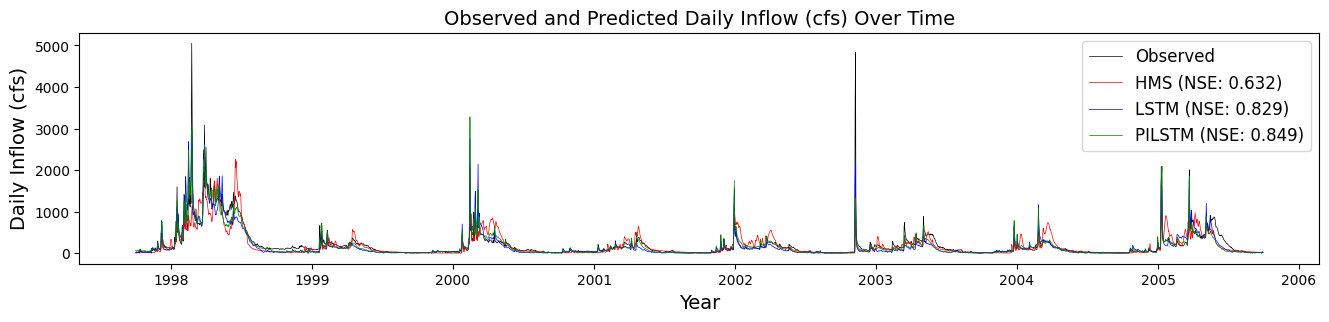

In [157]:
### Inflow

inflow_standard = pd.read_csv('figures_for_usace_writeup/data/inflow_standard_test.csv')

nse, perc_bias, alpha_nse, beta_nse, r, fhv, fms, flv = [], [], [], [], [], [], [], []
nse, perc_bias, alpha_nse, beta_nse, r, fhv, fms, flv = plt_timeseries(inflow_standard, None, nse, perc_bias, alpha_nse, beta_nse, r, fhv, fms, flv)

inner_index_names = ['HMS', 'LSTM', 'HMS_LSTM']
data = np.ones(3) * -999

# Create MultiIndex
multi_index = pd.MultiIndex.from_product([inner_index_names], names=['Model'])
metrics = pd.DataFrame(data, index=multi_index, columns=['remove_this_column'])
metrics['nse'] = nse
metrics['perc_bias'] = perc_bias
metrics['perc_bias'] *= 100
metrics['alpha_nse'] = alpha_nse
metrics['beta_nse'] = beta_nse
metrics['r'] = r
metrics['fhv'] = fhv
metrics['fms'] = fms
metrics['flv'] = flv


metrics = metrics.drop('remove_this_column', axis=1)

directory = './figures_for_usace_writeup/metrics1/normal_test/inflow/'
file_path = os.path.join(directory, 'inflow_normal_test_timeseries.csv')
os.makedirs(directory, exist_ok=True)

metrics.to_csv(file_path)

### SWE 2a-c, inflow figure 2 (month of year, not done but no need)

In [158]:
# mf_tuler_swe_standard['DateTime'] = pd.to_datetime(mf_tuler_swe_standard['DateTime'])

# # mf_tuler_swe_standard['WaterYear'] = mf_tuler_swe_standard['DateTime'].apply(water_year)
# mf_tuler_swe_standard['Month'] = mf_tuler_swe_standard['DateTime'].dt.month
# # Group by WaterYear and Month, then calculate the mean for each group
# #monthly_averages = mf_tuler_swe_standard.groupby(['WaterYear', 'Month']).mean().reset_index()

# # For plotting, you might want to calculate the overall average per month across all water years
# overall_monthly_averages = mf_tuler_swe_standard.groupby('Month').mean().reset_index()

# bottom_three = overall_monthly_averages.tail(3)
# remaining = overall_monthly_averages.iloc[:-3]
# rearranged_df = pd.concat([bottom_three, remaining]).reset_index(drop=True)

# plt.figure(figsize=(16, 6))

# dates = rearranged_df.index
# obs = rearranged_df['Observed']
# hms = rearranged_df['HMS']
# lstm = rearranged_df['LSTM']
# lstm_hms = rearranged_df['LSTM_HMS']

# hms_nse = str(round(nse(obs, hms), 3))
# lstm_nse = str(round(nse(obs, lstm), 3))
# lstm_hms_nse = str(round(nse(obs, lstm_hms), 3))

# plt.plot(dates, obs, linewidth=0.5, label='Observed', color='black')
# plt.plot(dates, hms, linewidth=0.5, label=f'HMS (NSE: {hms_nse})', color='red')
# plt.plot(dates, lstm, linewidth=0.5, label=f'LSTM (NSE: {lstm_nse})', color='blue')
# plt.plot(dates, lstm_hms, linewidth=0.5, label=f'PILSTM (NSE: {lstm_hms_nse})', color='green')

# # ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
# # ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("\n%Y"))

# # plt.setp(ax.get_xticklabels(), rotation=0, ha="center")
# plt.xticks(range(12), ['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep'])

# plt.xlabel("Year")
# plt.ylabel("Average SWE (inches)")


# plt.title('Observed and Predicted Month of Year Average SWE (inches)')
# plt.legend()
# # plt.show()

### day of year (complete for SWE)

#### SWE

In [159]:
def plt_day_of_year(data: pd.DataFrame, basin_name: str, nse: list, perc_bias: list, alpha_nse:list, beta_nse:list, r:list):

    ######################### PROCESS DATA #########################

    data['DateTime'] = pd.to_datetime(data['DateTime'])

    # mf_tuler_swe_standard['WaterYear'] = mf_tuler_swe_standard['DateTime'].apply(water_year)
    data['day_of_year'] = data['DateTime'].dt.dayofyear# Group by WaterYear and Month, then calculate the mean for each group
    data['month'] = data['DateTime'].dt.month# Group by WaterYear and Month, then calculate the mean for each group
    #monthly_averages = mf_tuler_swe_standard.groupby(['WaterYear', 'Month']).mean().reset_index()

    data['day_of_water_year'] = data['day_of_year']
    data.loc[data['month'] >= 10, 'day_of_water_year'] -= 273  # Oct 1 is the 274th day of the year
    data.loc[data['month'] < 10, 'day_of_water_year'] += 92    # Jan 1 is the 1st day of the year

    # For plotting, you might want to calculate the overall average per month across all water years
    daily_avg = data.groupby('day_of_water_year').mean()
    #overall_monthly_averages = mf_tuler_swe_standard.groupby('Month').mean().reset_index()

    rearranged_df = daily_avg

    dates = rearranged_df.index
    obs = rearranged_df['Observed']
    hms = rearranged_df['HMS']
    lstm = rearranged_df['LSTM']
    lstm_hms = rearranged_df['LSTM_HMS']

    ######################### CALCULATE METRICS #########################
   
    hms_metrics = calculate_metrics(obs.to_xarray(), hms.to_xarray(), desired_metrics)
    lstm_metrics = calculate_metrics(obs.to_xarray(), lstm.to_xarray(), desired_metrics)
    lstm_hms_metrics = calculate_metrics(obs.to_xarray(), lstm_hms.to_xarray(), desired_metrics)

    nse += [hms_metrics['NSE'], lstm_metrics["NSE"], lstm_hms_metrics["NSE"]]
    perc_bias += [hms_metrics['percent_bias'], lstm_metrics["percent_bias"], lstm_hms_metrics["percent_bias"]]
    alpha_nse += [hms_metrics['Alpha-NSE'], lstm_metrics["Alpha-NSE"], lstm_hms_metrics["Alpha-NSE"]]
    beta_nse += [hms_metrics['Beta-NSE'], lstm_metrics["Beta-NSE"], lstm_hms_metrics["Beta-NSE"]]
    r += [hms_metrics['Pearson-r'], lstm_metrics["Pearson-r"], lstm_hms_metrics["Pearson-r"]]
    
    ######################### PLOTTING #########################
    plt.figure(figsize=(16, 3))

    plt.plot(dates, obs, linewidth=0.5, label='Observed', color='black')
    plt.plot(dates, hms, linewidth=0.5, label=f'HMS (NSE: {round(hms_metrics["NSE"], 3)})', color='red')
    plt.plot(dates, lstm, linewidth=0.5, label=f'LSTM (NSE: {round(lstm_metrics["NSE"], 3)})', color='blue')
    plt.plot(dates, lstm_hms, linewidth=0.5, label=f'PILSTM (NSE: {round(lstm_hms_metrics["NSE"], 3)})', color='green')

    # Define month labels from October to September
    months = ['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']
    num_days_in_water_year = 366  # Adjust for leap year if necessary

    # Generate evenly spaced positions for month labels
    ticks = list(range(0, 365, 31))
    plt.xticks(ticks=ticks, labels=months)

    plt.xlabel("Month", fontsize=14)
    plt.ylabel("Average SWE (inches)", fontsize=14)

    title = f'Observed and Predicted Day of Year Average SWE (inches) in {basin_name}'
    plt.title(title, fontsize=14)
    plt.legend(fontsize=12, loc='upper right');
    
    directory = './figures_for_usace_writeup/figures1/day_of_year/SWE/'
    file_path = os.path.join(directory, title + '.png')
    os.makedirs(directory, exist_ok=True)
    plt.savefig(file_path, bbox_inches='tight')

    plt.show()

    return nse, perc_bias, alpha_nse, beta_nse, r

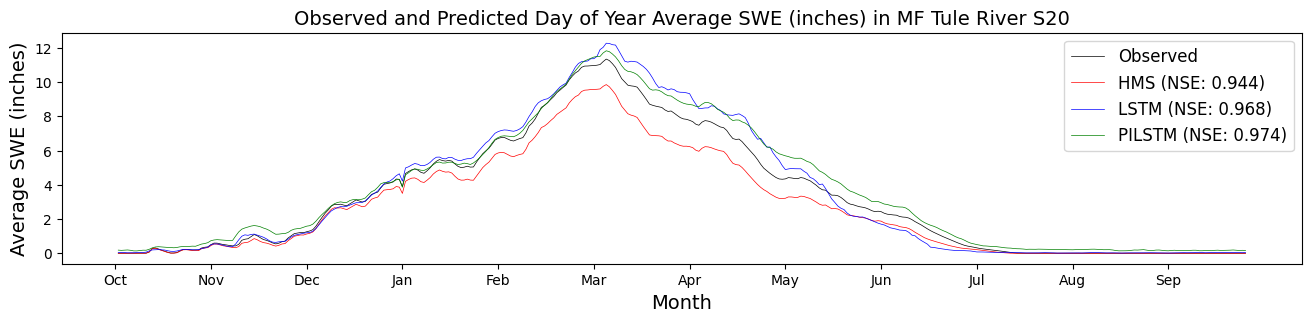

/Users/evanrobert/anaconda3/envs/lstm/lib/python3.10/site-packages/neuralhydrology/evaluation/metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)
/Users/evanrobert/anaconda3/envs/lstm/lib/python3.10/site-packages/neuralhydrology/evaluation/metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)
/Users/evanrobert/anaconda3/envs/lstm/lib/python3.10/site-packages/neuralhydrology/evaluation/metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)


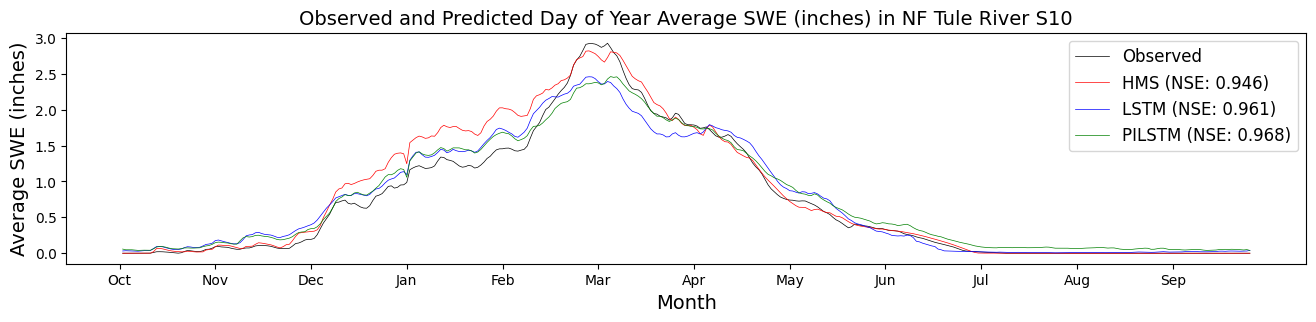

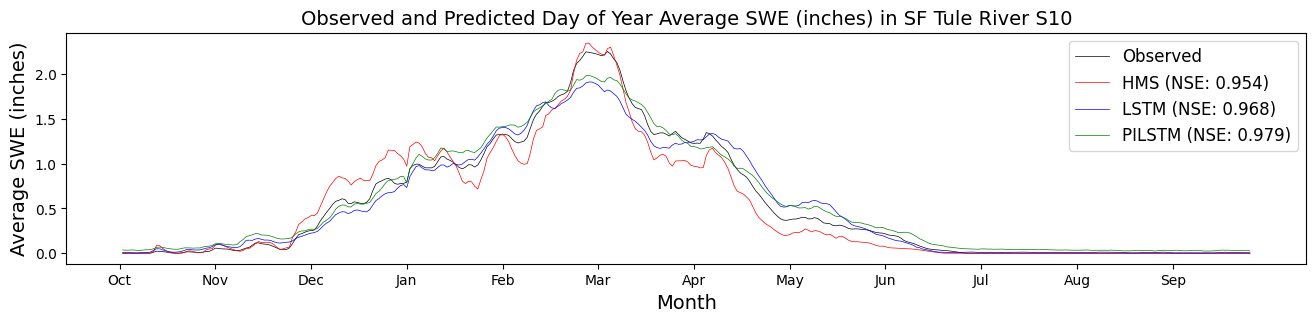

nse  perc_bias  alpha_nse  beta_nse         r
Basin             Model                                                       
MF Tule River S20 HMS       0.944460 -17.152545   0.845130 -0.164031  0.997250
                  LSTM      0.968001   6.266545   1.118730  0.059928  0.993604
                  HMS_LSTM  0.974017  12.373874   1.042565  0.118333  0.995123
NF Tule River S10 HMS       0.946024  12.506571   1.072540  0.106870  0.982615
                  LSTM      0.961316   4.530403   0.931062  0.038713  0.982583
                  HMS_LSTM  0.967826   7.901529   0.911182  0.067519  0.989175
SF Tule River S10 HMS       0.953838  -5.971949   0.970553 -0.049867  0.977947
                  LSTM      0.968358  -1.169384   0.924841 -0.009765  0.985999
                  HMS_LSTM  0.979202   6.850349   0.951027  0.057202  0.992047

In [160]:
inflow_extremes = pd.read_csv('figures_for_usace_writeup/data/inflow_extremes_test.csv')
inflow_standard = pd.read_csv('figures_for_usace_writeup/data/inflow_standard_test.csv')
mf_tuler_swe_extremes = pd.read_csv('figures_for_usace_writeup/data/MF_Tuler_S20_SWE_extremes_test.csv')
mf_tuler_swe_standard = pd.read_csv('figures_for_usace_writeup/data/MF_Tuler_S20_SWE_standard_test.csv')
nf_tuler_swe_extremes = pd.read_csv('figures_for_usace_writeup/data/NF_Tuler_S10_SWE_extremes_test.csv')
nf_tuler_swe_standard = pd.read_csv('figures_for_usace_writeup/data/NF_Tuler_S10_SWE_standard_test.csv')
sf_tuler_swe_extremes = pd.read_csv('figures_for_usace_writeup/data/SF_Tuler_S10_SWE_extremes_test.csv')
sf_tuler_swe_standard = pd.read_csv('figures_for_usace_writeup/data/SF_Tuler_S10_SWE_standard_test.csv')

nse, perc_bias, alpha_nse, beta_nse, r = [], [], [], [], []
plt_day_of_year(mf_tuler_swe_standard, 'MF Tule River S20', nse, perc_bias, alpha_nse, beta_nse, r)
plt_day_of_year(nf_tuler_swe_standard, 'NF Tule River S10', nse, perc_bias, alpha_nse, beta_nse, r)
plt_day_of_year(sf_tuler_swe_standard, 'SF Tule River S10', nse, perc_bias, alpha_nse, beta_nse, r)

outer_index_names = ['MF Tule River S20', 'NF Tule River S10', 'SF Tule River S10']
inner_index_names = ['HMS', 'LSTM', 'HMS_LSTM']
data = np.ones(9) * -999

# Create MultiIndex
multi_index = pd.MultiIndex.from_product([outer_index_names, inner_index_names], names=['Basin', 'Model'])
metrics = pd.DataFrame(data, index=multi_index, columns=['remove_this_column'])
metrics['nse'] = nse
metrics['perc_bias'] = perc_bias
metrics['perc_bias'] *= 100
metrics['alpha_nse'] = alpha_nse
metrics['beta_nse'] = beta_nse
metrics['r'] = r

metrics = metrics.drop('remove_this_column', axis=1)

directory = './figures_for_usace_writeup/metrics1/day_of_year/SWE/'
file_path = os.path.join(directory, 'SWE_day_of_year_timeseries.csv')
os.makedirs(directory, exist_ok=True)

metrics.to_csv(file_path)
metrics

#### inflow

In [161]:
def plt_day_of_year(data: pd.DataFrame, basin_name: str, nse: list, perc_bias: list, alpha_nse:list, beta_nse:list, r:list, fhv, fms, flv):

    ######################### PROCESS DATA #########################

    data['DateTime'] = pd.to_datetime(data['DateTime'])

    # mf_tuler_swe_standard['WaterYear'] = mf_tuler_swe_standard['DateTime'].apply(water_year)
    data['day_of_year'] = data['DateTime'].dt.dayofyear# Group by WaterYear and Month, then calculate the mean for each group
    data['month'] = data['DateTime'].dt.month# Group by WaterYear and Month, then calculate the mean for each group
    #monthly_averages = mf_tuler_swe_standard.groupby(['WaterYear', 'Month']).mean().reset_index()

    data['day_of_water_year'] = data['day_of_year']
    data.loc[data['month'] >= 10, 'day_of_water_year'] -= 273  # Oct 1 is the 274th day of the year
    data.loc[data['month'] < 10, 'day_of_water_year'] += 92    # Jan 1 is the 1st day of the year

    # For plotting, you might want to calculate the overall average per month across all water years
    daily_avg = data.groupby('day_of_water_year').mean()
    #overall_monthly_averages = mf_tuler_swe_standard.groupby('Month').mean().reset_index()

    rearranged_df = daily_avg

    dates = rearranged_df.index
    obs = rearranged_df['Observed']
    hms = rearranged_df['HMS']
    lstm = rearranged_df['LSTM']
    lstm_hms = rearranged_df['LSTM-HMS']

    ######################### CALCULATE METRICS #########################
   
    hms_metrics = calculate_metrics(obs.to_xarray(), hms.to_xarray(), desired_metrics)
    lstm_metrics = calculate_metrics(obs.to_xarray(), lstm.to_xarray(), desired_metrics)
    lstm_hms_metrics = calculate_metrics(obs.to_xarray(), lstm_hms.to_xarray(), desired_metrics)

    nse += [hms_metrics['NSE'], lstm_metrics["NSE"], lstm_hms_metrics["NSE"]]
    perc_bias += [hms_metrics['percent_bias'], lstm_metrics["percent_bias"], lstm_hms_metrics["percent_bias"]]
    alpha_nse += [hms_metrics['Alpha-NSE'], lstm_metrics["Alpha-NSE"], lstm_hms_metrics["Alpha-NSE"]]
    beta_nse += [hms_metrics['Beta-NSE'], lstm_metrics["Beta-NSE"], lstm_hms_metrics["Beta-NSE"]]
    r += [hms_metrics['Pearson-r'], lstm_metrics["Pearson-r"], lstm_hms_metrics["Pearson-r"]]
    fhv += [hms_metrics['FHV'], lstm_metrics["FHV"], lstm_hms_metrics["FHV"]]
    fms += [hms_metrics['FMS'], lstm_metrics["FMS"], lstm_hms_metrics["FMS"]]
    flv += [hms_metrics['FLV'], lstm_metrics["FLV"], lstm_hms_metrics["FLV"]]
    
    ######################### PLOTTING #########################
    plt.figure(figsize=(16, 3))

    plt.plot(dates, obs, linewidth=0.5, label='Observed', color='black')
    plt.plot(dates, hms, linewidth=0.5, label=f'HMS (NSE: {round(hms_metrics["NSE"], 3)})', color='red')
    plt.plot(dates, lstm, linewidth=0.5, label=f'LSTM (NSE: {round(lstm_metrics["NSE"], 3)})', color='blue')
    plt.plot(dates, lstm_hms, linewidth=0.5, label=f'PILSTM (NSE: {round(lstm_hms_metrics["NSE"], 3)})', color='green')

    # Define month labels from October to September
    months = ['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']
    num_days_in_water_year = 366  # Adjust for leap year if necessary

    # Generate evenly spaced positions for month labels
    ticks = list(range(0, 365, 31))
    plt.xticks(ticks=ticks, labels=months)

    plt.xlabel("Month", fontsize=14)
    plt.ylabel("Average Inflow (cfs)", fontsize=14)

    title = f'Observed and Predicted Day of Year Average Inflow (cfs)'
    plt.title(title, fontsize=14)
    plt.legend(fontsize=12, loc='upper right');
    
    directory = './figures_for_usace_writeup/figures1/day_of_year/inflow/'
    file_path = os.path.join(directory, title + '.png')
    os.makedirs(directory, exist_ok=True)
    plt.savefig(file_path, bbox_inches='tight')

    plt.show()

    return nse, perc_bias, alpha_nse, beta_nse, r, fhv, fms, flv

/var/folders/93/12rdf89j3ql6h5j8b_3g9ddm0000gn/T/ipykernel_40059/4210490693.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['DateTime'] = pd.to_datetime(data['DateTime'])


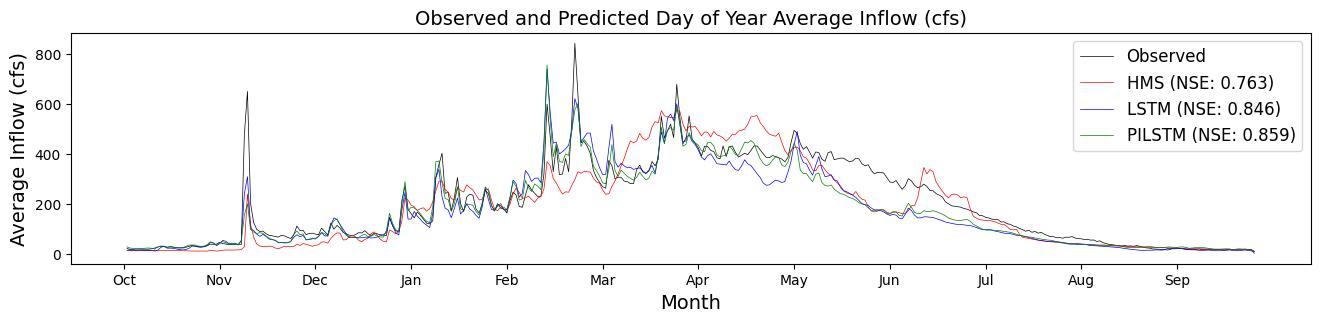

nse  perc_bias  alpha_nse  beta_nse         r        fhv  \
Model                                                                     
HMS       0.763406  -7.359746   1.033131 -0.090735  0.890012 -13.017123   
LSTM      0.846432 -13.248058   0.951404 -0.163329  0.934555  -6.559528   
HMS_LSTM  0.859411 -11.278671   0.934483 -0.139049  0.937419  -9.229303   

                fms        flv  
Model                           
HMS       32.101888  72.497326  
LSTM      12.327146  62.195468  
HMS_LSTM   7.351656  52.956030

In [162]:
inflow_standard = pd.read_csv('figures_for_usace_writeup/data/inflow_standard_test.csv')

nse, perc_bias, alpha_nse, beta_nse, r, fhv, fms, flv = [], [], [], [], [], [], [], []
nse, perc_bias, alpha_nse, beta_nse, r, fhv, fms, flv = plt_day_of_year(inflow_standard, None, nse, perc_bias, alpha_nse, beta_nse, r, fhv, fms, flv)

inner_index_names = ['HMS', 'LSTM', 'HMS_LSTM']
data = np.ones(3) * -999

# Create MultiIndex
multi_index = pd.MultiIndex.from_product([inner_index_names], names=['Model'])
metrics = pd.DataFrame(data, index=multi_index, columns=['remove_this_column'])
metrics['nse'] = nse
metrics['perc_bias'] = perc_bias
metrics['perc_bias'] *= 100
metrics['alpha_nse'] = alpha_nse
metrics['beta_nse'] = beta_nse
metrics['r'] = r
metrics['fhv'] = fhv
metrics['fms'] = fms
metrics['flv'] = flv

metrics = metrics.drop('remove_this_column', axis=1)

directory = './figures_for_usace_writeup/metrics1/day_of_year/inflow/'
file_path = os.path.join(directory, 'inflow_day_of_year_timeseries.csv')
os.makedirs(directory, exist_ok=True)

metrics.to_csv(file_path)
metrics

### SWE 3, 4, 5, inflow figure 3 (wettest/driest years, done for SWE)

#### SWE

In [19]:
def plt_wet_dry_years(data: pd.DataFrame, test_cutof_year: int, basin_name: str, nse: list, perc_bias: list, alpha_nse:list, beta_nse:list, r:list):
        
    ######################### PROCESS DATA #########################
    
    data['DateTime'] = pd.to_datetime(data['DateTime'])

    def water_year(date):
        year = date.year
        if date.month >= 10:  # Assuming water year starts in October
            return year + 1
        else:
            return year

    data['WaterYear'] = data['DateTime'].apply(water_year)

    '''!!!!!!!!!!!'''
    #IMPORTANT!!!! MAKE SURE THIS FILTERING IS CORRECT!!!!! the date cutoff of the test years
    data = data[data['WaterYear'] >= test_cutof_year]
    data_no_dt = data.drop(columns=['DateTime'])
    # Group by WaterYear and sum the values
    water_year_sums = data_no_dt.groupby('WaterYear').sum().reset_index()
    # Sort by the observed values
    sorted_water_year_sums = water_year_sums.sort_values(by='Observed', ascending=False)
    # Get the 2 wettest years
    wettest_years = sorted_water_year_sums.head(2)['WaterYear']
    # Get the 2 driest years
    driest_years = sorted_water_year_sums.tail(2)['WaterYear']
    # Combine wettest and driest years
    selected_years = pd.concat([wettest_years, driest_years])
    # Filter the original DataFrame to include only the selected years
    filtered_df = data[data['WaterYear'].isin(selected_years)]
    # Plotting the data for the selected years
    for i, year in enumerate(selected_years):
        
        data_swe_standard_year = filtered_df[filtered_df['WaterYear'] == year].copy()
        data_swe_standard_year['DateTime'] = pd.to_datetime(data_swe_standard_year['DateTime'])

        fig, ax = plt.subplots(figsize=(16, 3))

        dates = data_swe_standard_year['DateTime']
        obs = data_swe_standard_year['Observed']
        hms = data_swe_standard_year['HMS']
        lstm = data_swe_standard_year['LSTM']
        lstm_hms = data_swe_standard_year['LSTM_HMS']

        ######################### CALCULATE METRICS #########################

        hms_metrics = calculate_metrics(obs.to_xarray(), hms.to_xarray(), desired_metrics)
        lstm_metrics = calculate_metrics(obs.to_xarray(), lstm.to_xarray(), desired_metrics)
        lstm_hms_metrics = calculate_metrics(obs.to_xarray(), lstm_hms.to_xarray(), desired_metrics)


        nse += [hms_metrics['NSE'], lstm_metrics["NSE"], lstm_hms_metrics["NSE"]]
        perc_bias += [hms_metrics['percent_bias'], lstm_metrics["percent_bias"], lstm_hms_metrics["percent_bias"]]
        alpha_nse += [hms_metrics['Alpha-NSE'], lstm_metrics["Alpha-NSE"], lstm_hms_metrics["Alpha-NSE"]]
        beta_nse += [hms_metrics['Beta-NSE'], lstm_metrics["Beta-NSE"], lstm_hms_metrics["Beta-NSE"]]
        r += [hms_metrics['Pearson-r'], lstm_metrics["Pearson-r"], lstm_hms_metrics["Pearson-r"]]
        
        ######################### PLOTTING #########################

        ax.plot(dates, obs, linewidth=0.5, label='Observed', color='black')
        ax.plot(dates, hms, linewidth=0.5, label=f'HMS (NSE: {round(hms_metrics["NSE"], 3)})', color='red')
        ax.plot(dates, lstm, linewidth=0.5, label=f'LSTM (NSE: {round(lstm_metrics["NSE"], 3)})', color='blue')
        ax.plot(dates, lstm_hms, linewidth=0.5, label=f'PILSTM (NSE: {round(lstm_hms_metrics["NSE"], 3)})', color='green')

        ax.set_xlabel("Year", fontsize=14)
        ax.set_ylabel("Daily SWE (inches)", fontsize=14)

        wet = 'dry' if i > 1 else 'wet'

        title = f'Observed and Predicted Daily SWE (inches) Over Time for {year} ({wet}) in {basin_name}'
        plt.title(title, fontsize=14)
        plt.legend(fontsize=12, loc='upper right');

        directory = './figures_for_usace_writeup/figures1/wettest_driest/SWE/'
        file_path = os.path.join(directory, title + '.png')
        os.makedirs(directory, exist_ok=True)
        plt.savefig(file_path, bbox_inches='tight')
        plt.show()
        

    return nse, perc_bias, alpha_nse, beta_nse, r


plots for mf


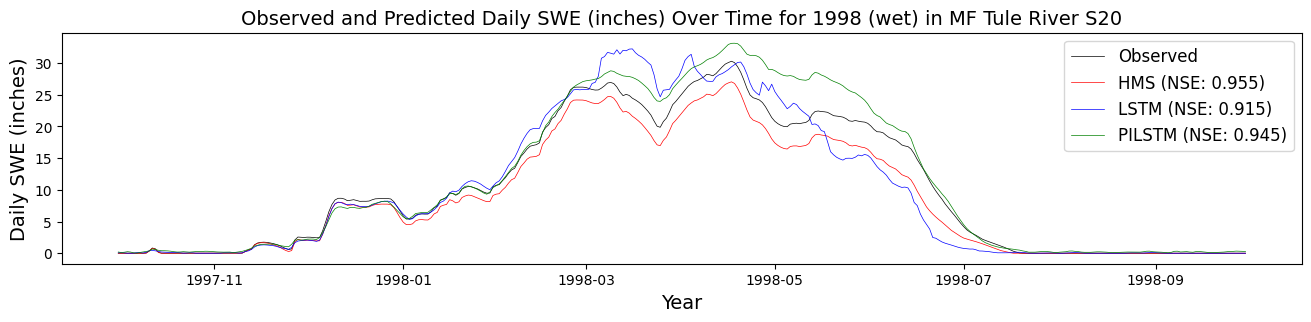

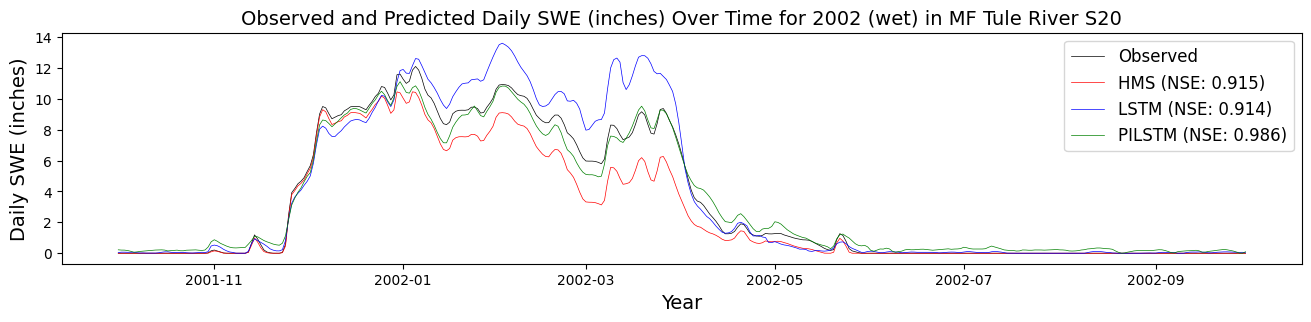

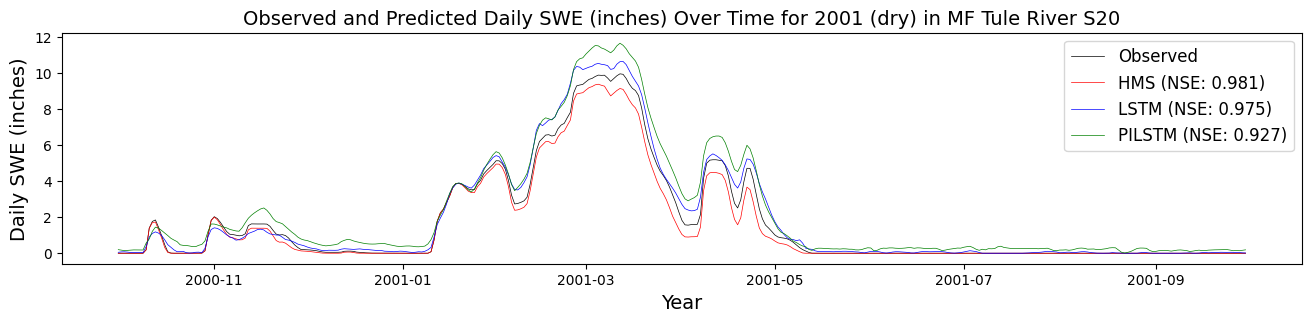

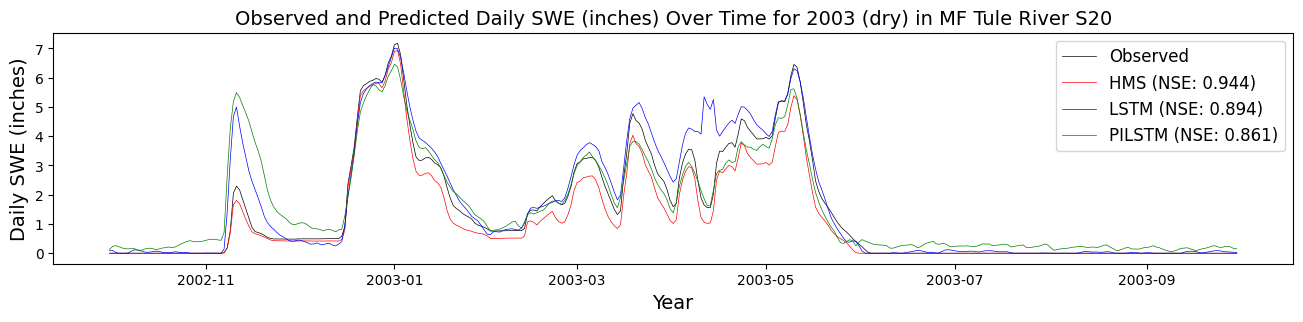

plots for nf


/Users/evanrobert/anaconda3/envs/lstm/lib/python3.10/site-packages/neuralhydrology/evaluation/metrics.py:412: RuntimeWarning: invalid value encountered in log
  qom_upper = np.log(obs[np.round(upper * len(obs)).astype(int)])
/Users/evanrobert/anaconda3/envs/lstm/lib/python3.10/site-packages/neuralhydrology/evaluation/metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)
/Users/evanrobert/anaconda3/envs/lstm/lib/python3.10/site-packages/neuralhydrology/evaluation/metrics.py:412: RuntimeWarning: invalid value encountered in log
  qom_upper = np.log(obs[np.round(upper * len(obs)).astype(int)])
/Users/evanrobert/anaconda3/envs/lstm/lib/python3.10/site-packages/neuralhydrology/evaluation/metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)
/Users/evanrobert/anaconda3/envs/lstm/lib/python3.10/site-packages/neuralhydrology/evaluation/metrics.py:412: RuntimeWarning: invalid value encountered in log
  qom_upper = np.log(obs[np.round

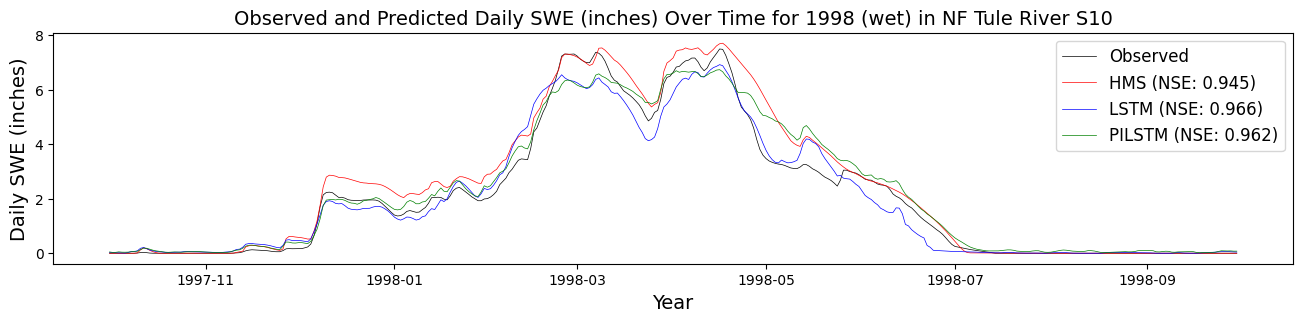

/Users/evanrobert/anaconda3/envs/lstm/lib/python3.10/site-packages/neuralhydrology/evaluation/metrics.py:412: RuntimeWarning: invalid value encountered in log
  qom_upper = np.log(obs[np.round(upper * len(obs)).astype(int)])
/Users/evanrobert/anaconda3/envs/lstm/lib/python3.10/site-packages/neuralhydrology/evaluation/metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)
/Users/evanrobert/anaconda3/envs/lstm/lib/python3.10/site-packages/neuralhydrology/evaluation/metrics.py:412: RuntimeWarning: invalid value encountered in log
  qom_upper = np.log(obs[np.round(upper * len(obs)).astype(int)])
/Users/evanrobert/anaconda3/envs/lstm/lib/python3.10/site-packages/neuralhydrology/evaluation/metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)
/Users/evanrobert/anaconda3/envs/lstm/lib/python3.10/site-packages/neuralhydrology/evaluation/metrics.py:412: RuntimeWarning: invalid value encountered in log
  qom_upper = np.log(obs[np.round

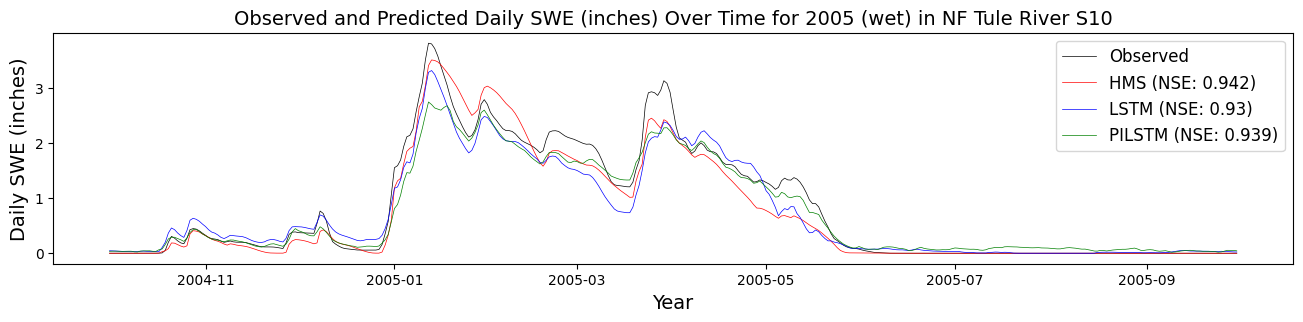

/Users/evanrobert/anaconda3/envs/lstm/lib/python3.10/site-packages/neuralhydrology/evaluation/metrics.py:412: RuntimeWarning: invalid value encountered in log
  qom_upper = np.log(obs[np.round(upper * len(obs)).astype(int)])
/Users/evanrobert/anaconda3/envs/lstm/lib/python3.10/site-packages/neuralhydrology/evaluation/metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)
/Users/evanrobert/anaconda3/envs/lstm/lib/python3.10/site-packages/neuralhydrology/evaluation/metrics.py:412: RuntimeWarning: invalid value encountered in log
  qom_upper = np.log(obs[np.round(upper * len(obs)).astype(int)])
/Users/evanrobert/anaconda3/envs/lstm/lib/python3.10/site-packages/neuralhydrology/evaluation/metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)
/Users/evanrobert/anaconda3/envs/lstm/lib/python3.10/site-packages/neuralhydrology/evaluation/metrics.py:412: RuntimeWarning: invalid value encountered in log
  qom_upper = np.log(obs[np.round

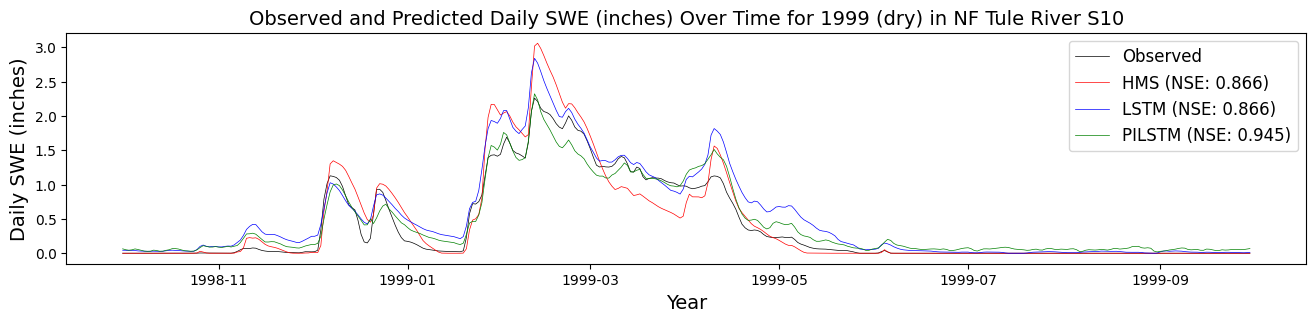

/Users/evanrobert/anaconda3/envs/lstm/lib/python3.10/site-packages/neuralhydrology/evaluation/metrics.py:412: RuntimeWarning: invalid value encountered in log
  qom_upper = np.log(obs[np.round(upper * len(obs)).astype(int)])
/Users/evanrobert/anaconda3/envs/lstm/lib/python3.10/site-packages/neuralhydrology/evaluation/metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)
/Users/evanrobert/anaconda3/envs/lstm/lib/python3.10/site-packages/neuralhydrology/evaluation/metrics.py:412: RuntimeWarning: invalid value encountered in log
  qom_upper = np.log(obs[np.round(upper * len(obs)).astype(int)])
/Users/evanrobert/anaconda3/envs/lstm/lib/python3.10/site-packages/neuralhydrology/evaluation/metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)
/Users/evanrobert/anaconda3/envs/lstm/lib/python3.10/site-packages/neuralhydrology/evaluation/metrics.py:412: RuntimeWarning: invalid value encountered in log
  qom_upper = np.log(obs[np.round

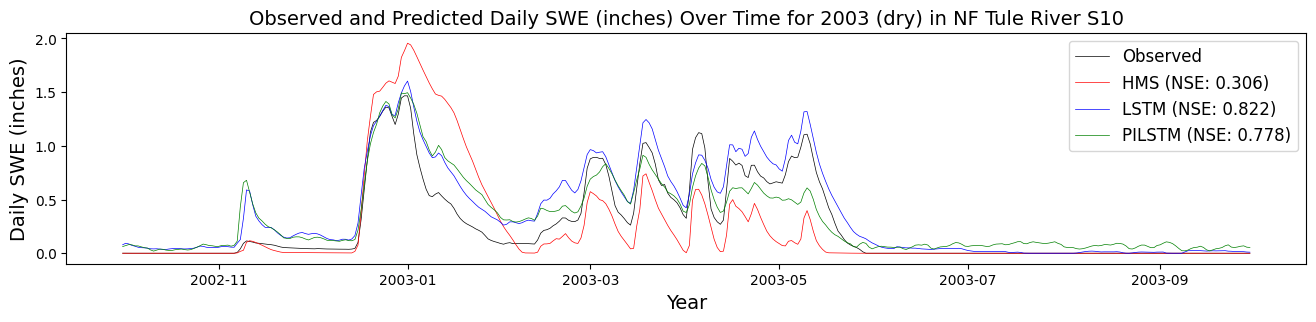

plots for sf


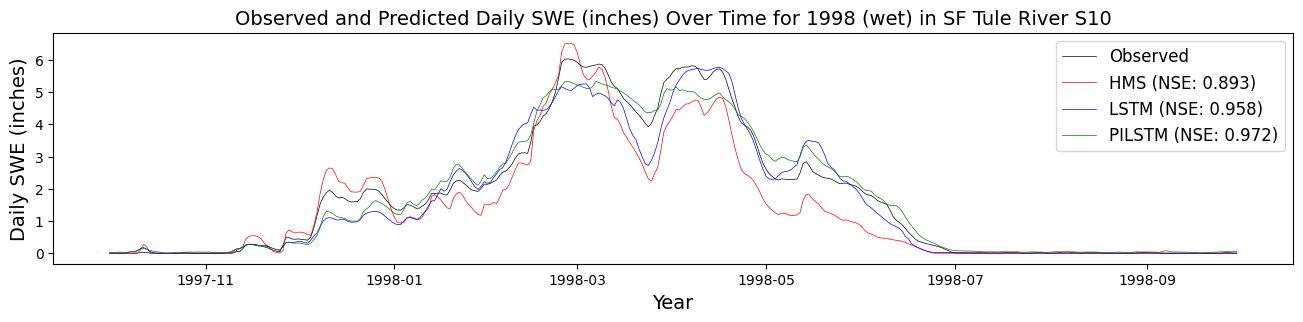

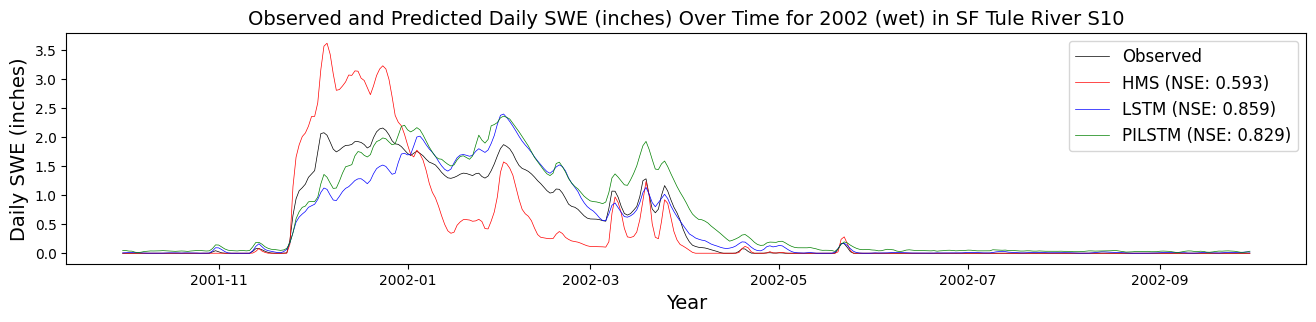

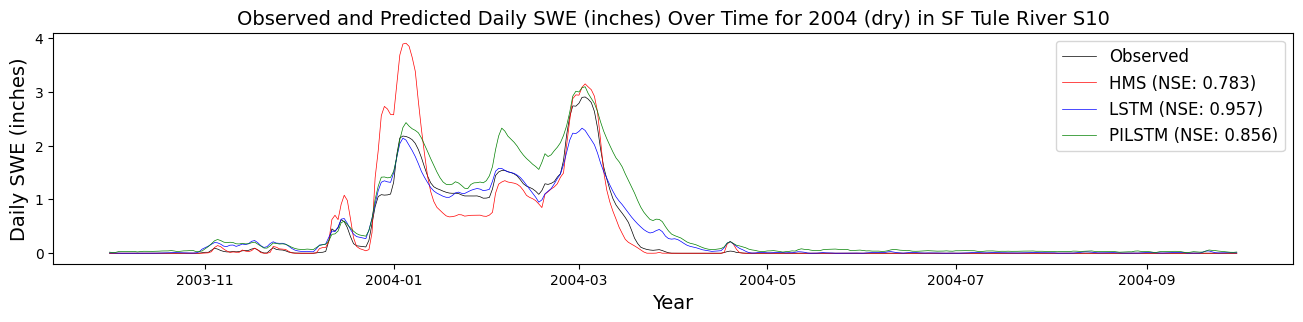

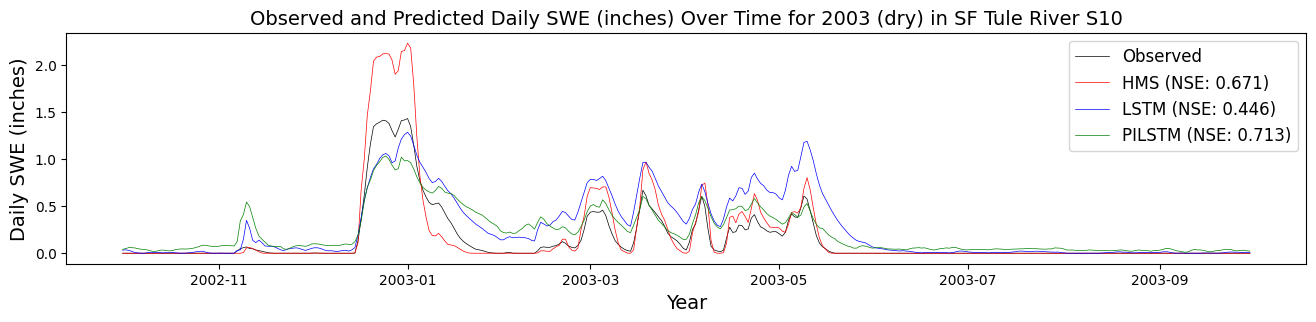

nse  perc_bias  alpha_nse  beta_nse  \
Basin             Wet/Dry Model                                                
MF Tule River S20 Wet1    HMS       0.955275 -14.884513   0.876874 -0.148101   
                          LSTM      0.915197  -1.724421   1.085206 -0.017158   
                          HMS_LSTM  0.944900  11.671969   1.146500  0.116136   
                  Wet2    HMS       0.914587 -21.562444   0.834609 -0.170387   
                          LSTM      0.914254  13.389398   1.158995  0.105804   
                          HMS_LSTM  0.986448   0.661201   0.922404  0.005225   
                  Dry1    HMS       0.981108 -11.963609   0.922416 -0.074880   
                          LSTM      0.975431  12.003711   1.088090  0.075131   
                          HMS_LSTM  0.926544  31.264241   1.142775  0.195681   
                  Dry2    HMS       0.943833 -19.575424   0.873712 -0.152682   
                          LSTM      0.894176  16.259355   1.093167  0.126818   
                          HMS_LSTM  0.861117  11.272049   0.907182  0.087919   
NF Tule River S10 Wet1    HMS       0.945324  16.453995   1.089102  0.143715   
                          LSTM      0.966376  -4.208102   0.946388 -0.036755   
                          HMS_LSTM  0.961625   7.380207   0.979068  0.064461   
                  Wet2    HMS       0.942033 -11.479876   0.970994 -0.092549   
                          LSTM      0.929971 -10.311359   0.848210 -0.083128   
                          HMS_LSTM  0.939449  -9.322706   0.825347 -0.075158   
                  Dry1    HMS       0.866310  10.644513   1.174558  0.070339   
                          LSTM      0.865628  35.078740   1.117955  0.231800   
                          HMS_LSTM  0.944831  13.627157   0.911182  0.090048   
                  Dry2    HMS       0.305562 -13.171475   1.195765 -0.092776   
                          LSTM      0.822446  42.398580   1.111125  0.298644   
                          HMS_LSTM  0.778166  23.521257   0.910928  0.165677   
SF Tule River S10 Wet1    HMS       0.893414 -18.681121   0.880789 -0.163060   
                          LSTM      0.957573  -5.856284   0.961402 -0.051117   
                          HMS_LSTM  0.971662   0.448747   0.955939  0.003917   
                  Wet2    HMS       0.592980  -7.267760   1.256762 -0.049870   
                          LSTM      0.858724   0.660588   0.973704  0.004533   
                          HMS_LSTM  0.828561  27.024780   1.086864  0.185439   
                  Dry1    HMS       0.782550   8.070343   1.211848  0.043031   
                          LSTM      0.957351   6.401790   0.895565  0.034134   
                          HMS_LSTM  0.855728  43.804179   1.173507  0.233563   
                  Dry2    HMS       0.670669  28.876426   1.483003  0.140303   
                          LSTM      0.446204  86.001691   1.131319  0.417860   
                          HMS_LSTM  0.713133  53.959646   0.804780  0.262176   

                                           r  
Basin             Wet/Dry Model               
MF Tule River S20 Wet1    HMS       0.995649  
                          LSTM      0.964408  
                          HMS_LSTM  0.991213  
                  Wet2    HMS       0.982611  
                          LSTM      0.978743  
                          HMS_LSTM  0.995932  
                  Dry1    HMS       0.996062  
                          LSTM      0.994870  
                          HMS_LSTM  0.993533  
                  Dry2    HMS       0.990325  
                          LSTM      0.962924  
                          HMS_LSTM  0.932462  
NF Tule River S10 Wet1    HMS       0.988026  
                          LSTM      0.984468  
                          HMS_LSTM  0.982748  
                  Wet2    HMS       0.974995  
                          LSTM      0.976374  
                          HMS_LSTM  0.985219  
                  Dry1    HMS       0.958166  
             

In [164]:
inflow_extremes = pd.read_csv('figures_for_usace_writeup/data/inflow_extremes_test.csv')
inflow_standard = pd.read_csv('figures_for_usace_writeup/data/inflow_standard_test.csv')
mf_tuler_swe_extremes = pd.read_csv('figures_for_usace_writeup/data/MF_Tuler_S20_SWE_extremes_test.csv')
mf_tuler_swe_standard = pd.read_csv('figures_for_usace_writeup/data/MF_Tuler_S20_SWE_standard_test.csv')
nf_tuler_swe_extremes = pd.read_csv('figures_for_usace_writeup/data/NF_Tuler_S10_SWE_extremes_test.csv')
nf_tuler_swe_standard = pd.read_csv('figures_for_usace_writeup/data/NF_Tuler_S10_SWE_standard_test.csv')
sf_tuler_swe_extremes = pd.read_csv('figures_for_usace_writeup/data/SF_Tuler_S10_SWE_extremes_test.csv')
sf_tuler_swe_standard = pd.read_csv('figures_for_usace_writeup/data/SF_Tuler_S10_SWE_standard_test.csv')

nse, perc_bias, alpha_nse, beta_nse, r = [], [], [], [], []
print('plots for mf')
plt_wet_dry_years(mf_tuler_swe_standard, 1998, 'MF Tule River S20', nse, perc_bias, alpha_nse, beta_nse, r)
print('plots for nf')
plt_wet_dry_years(nf_tuler_swe_standard, 1998, 'NF Tule River S10', nse, perc_bias, alpha_nse, beta_nse, r)
print('plots for sf')
plt_wet_dry_years(sf_tuler_swe_standard, 1998, 'SF Tule River S10', nse, perc_bias, alpha_nse, beta_nse, r)

outer_index_names = ['MF Tule River S20', 'NF Tule River S10', 'SF Tule River S10']
middle_index_names = ['Wet1', 'Wet2', 'Dry1', 'Dry2']
inner_index_names = ['HMS', 'LSTM', 'HMS_LSTM']
data = np.ones(36) * -999

# Create MultiIndex
multi_index = pd.MultiIndex.from_product([outer_index_names, middle_index_names, inner_index_names], names=['Basin', 'Wet/Dry', 'Model'])
metrics = pd.DataFrame(data, index=multi_index, columns=['remove_this_column'])
metrics['nse'] = nse
metrics['perc_bias'] = perc_bias
metrics['perc_bias'] *= 100
metrics['alpha_nse'] = alpha_nse
metrics['beta_nse'] = beta_nse
metrics['r'] = r

metrics = metrics.drop('remove_this_column', axis=1)

directory = './figures_for_usace_writeup/metrics1/day_of_year/inflow/'
file_path = os.path.join(directory, 'inflow_day_of_year_timeseries.csv')
os.makedirs(directory, exist_ok=True)

directory = './figures_for_usace_writeup/metrics1/wettest_driest/SWE/'
file_path = os.path.join(directory, 'swe_wettest_driest.csv')
os.makedirs(directory, exist_ok=True)
metrics.to_csv(file_path)
metrics

#### inflow

In [165]:
def plt_wet_dry_years(data: pd.DataFrame, test_cutof_year: int, basin_name: str, nse: list, perc_bias: list, alpha_nse:list, beta_nse:list, r:list, fhv, fms, flv):
        
    ######################### PROCESS DATA #########################
    
    data['DateTime'] = pd.to_datetime(data['DateTime'])

    def water_year(date):
        year = date.year
        if date.month >= 10:  # Assuming water year starts in October
            return year + 1
        else:
            return year

    data['WaterYear'] = data['DateTime'].apply(water_year)

    '''!!!!!!!!!!!'''
    #IMPORTANT!!!! MAKE SURE THIS FILTERING IS CORRECT!!!!! the date cutoff of the test years
    data = data[data['WaterYear'] >= test_cutof_year]
    data_no_dt = data.drop(columns=['DateTime'])
    # Group by WaterYear and sum the values
    water_year_sums = data_no_dt.groupby('WaterYear').sum().reset_index()
    # Sort by the observed values
    sorted_water_year_sums = water_year_sums.sort_values(by='Observed', ascending=False)
    # Get the 2 wettest years
    wettest_years = sorted_water_year_sums.head(2)['WaterYear']
    # Get the 2 driest years
    driest_years = sorted_water_year_sums.tail(2)['WaterYear']
    # Combine wettest and driest years
    selected_years = pd.concat([wettest_years, driest_years])
    # Filter the original DataFrame to include only the selected years
    filtered_df = data[data['WaterYear'].isin(selected_years)]
    # Plotting the data for the selected years
    for i, year in enumerate(selected_years):
        
        data_swe_standard_year = filtered_df[filtered_df['WaterYear'] == year].copy()
        data_swe_standard_year['DateTime'] = pd.to_datetime(data_swe_standard_year['DateTime'])

        fig, ax = plt.subplots(figsize=(16, 3))

        dates = data_swe_standard_year['DateTime']
        obs = data_swe_standard_year['Observed']
        hms = data_swe_standard_year['HMS']
        lstm = data_swe_standard_year['LSTM']
        lstm_hms = data_swe_standard_year['LSTM-HMS']

        ######################### CALCULATE METRICS #########################

        hms_metrics = calculate_metrics(obs.to_xarray(), hms.to_xarray(), desired_metrics)
        lstm_metrics = calculate_metrics(obs.to_xarray(), lstm.to_xarray(), desired_metrics)
        lstm_hms_metrics = calculate_metrics(obs.to_xarray(), lstm_hms.to_xarray(), desired_metrics)

        nse += [hms_metrics['NSE'], lstm_metrics["NSE"], lstm_hms_metrics["NSE"]]
        perc_bias += [hms_metrics['percent_bias'], lstm_metrics["percent_bias"], lstm_hms_metrics["percent_bias"]]
        alpha_nse += [hms_metrics['Alpha-NSE'], lstm_metrics["Alpha-NSE"], lstm_hms_metrics["Alpha-NSE"]]
        beta_nse += [hms_metrics['Beta-NSE'], lstm_metrics["Beta-NSE"], lstm_hms_metrics["Beta-NSE"]]
        r += [hms_metrics['Pearson-r'], lstm_metrics["Pearson-r"], lstm_hms_metrics["Pearson-r"]]
        fhv += [hms_metrics['FHV'], lstm_metrics["FHV"], lstm_hms_metrics["FHV"]]
        fms += [hms_metrics['FMS'], lstm_metrics["FMS"], lstm_hms_metrics["FMS"]]
        flv += [hms_metrics['FLV'], lstm_metrics["FLV"], lstm_hms_metrics["FLV"]]
        
        ######################### PLOTTING #########################

        ax.plot(dates, obs, linewidth=0.5, label='Observed', color='black')
        ax.plot(dates, hms, linewidth=0.5, label=f'HMS (NSE: {round(hms_metrics["NSE"], 3)})', color='red')
        ax.plot(dates, lstm, linewidth=0.5, label=f'LSTM (NSE: {round(lstm_metrics["NSE"], 3)})', color='blue')
        ax.plot(dates, lstm_hms, linewidth=0.5, label=f'PILSTM (NSE: {round(lstm_hms_metrics["NSE"], 3)})', color='green')

        ax.set_xlabel("Year", fontsize=14)
        ax.set_ylabel("Daily Inflow (cfs)", fontsize=14)

        wet = 'dry' if i > 1 else 'wet'

        title = f'Observed and Predicted Daily Inflow (cfs) Over Time for {year} ({wet})'
        plt.title(title, fontsize=14)
        plt.legend(fontsize=12, loc='upper right');

        directory = './figures_for_usace_writeup/figures1/wettest_driest/inflow/'
        file_path = os.path.join(directory, title + '.png')
        os.makedirs(directory, exist_ok=True)
        plt.savefig(file_path, bbox_inches='tight')
        plt.show()

    return nse, perc_bias, alpha_nse, beta_nse, r, fhv, fms, flv


/var/folders/93/12rdf89j3ql6h5j8b_3g9ddm0000gn/T/ipykernel_40059/3929212845.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['DateTime'] = pd.to_datetime(data['DateTime'])


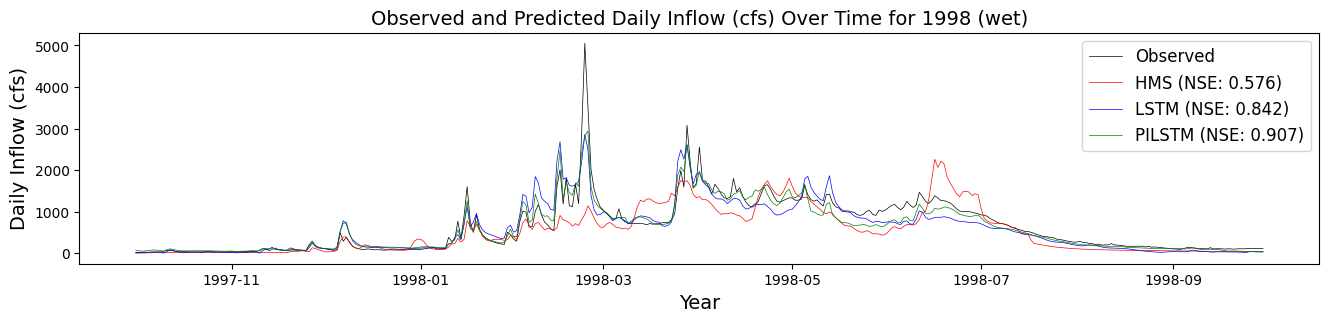

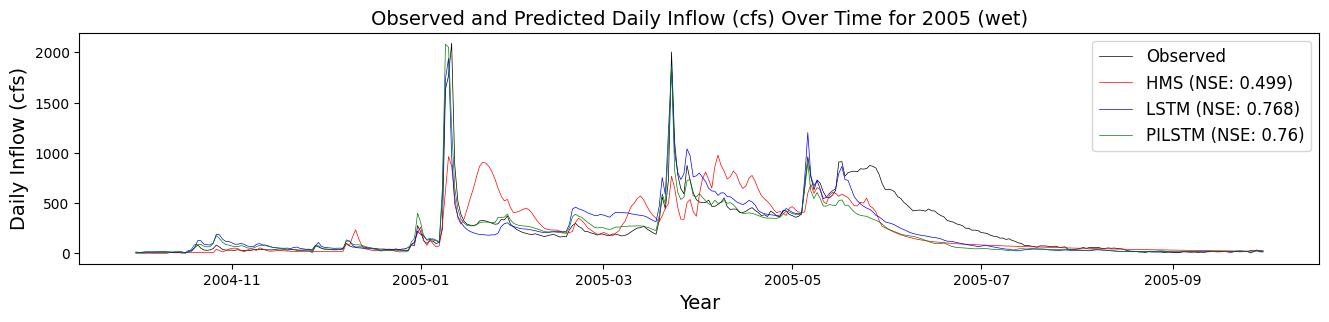

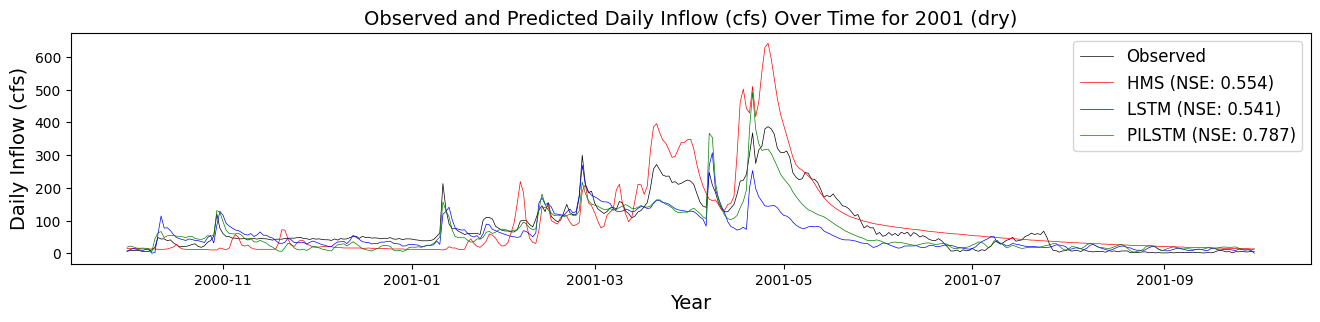

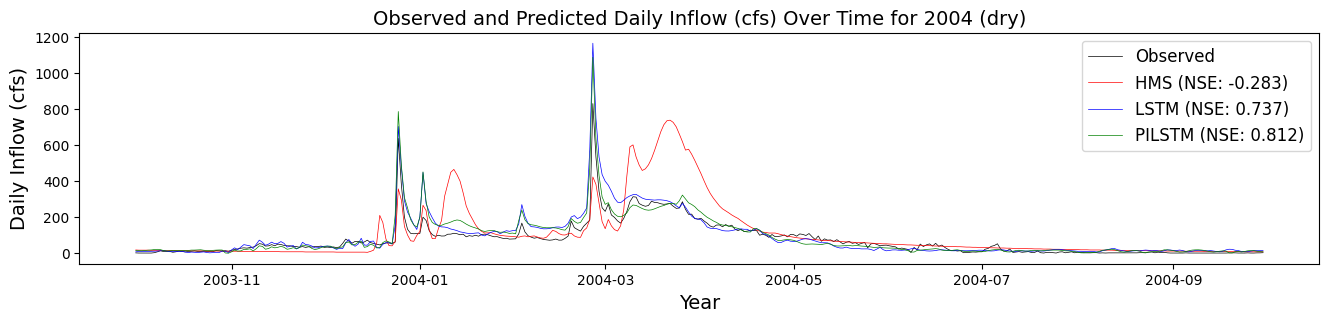

nse  perc_bias  alpha_nse  beta_nse         r  \
Wet/Dry Model                                                          
Wet1    HMS       0.575956 -18.504222   0.837310 -0.183787  0.782758   
        LSTM      0.842175  -7.346994   0.922244 -0.072972  0.920599   
        HMS_LSTM  0.906712  -6.240047   0.889164 -0.061977  0.956610   
Wet2    HMS       0.498704  -6.900869   0.848183 -0.056669  0.719968   
        LSTM      0.768352  -4.750304   0.953925 -0.039009  0.880492   
        HMS_LSTM  0.759603 -16.528292   0.872118 -0.135727  0.882114   
Dry1    HMS       0.554274  11.213910   1.418762  0.108556  0.908871   
        LSTM      0.541119 -26.741794   0.639577 -0.258873  0.795208   
        HMS_LSTM  0.787497 -17.491285   0.870036 -0.169324  0.904060   
Dry2    HMS      -0.283102  41.550107   1.656763  0.326811  0.775176   
        LSTM      0.737430  20.177571   1.314078  0.158706  0.947211   
        HMS_LSTM  0.812425  16.504392   1.226110  0.129815  0.951229   

                        fhv        fms          flv  
Wet/Dry Model                                        
Wet1    HMS      -34.157109  11.965262 -1323.998719  
        LSTM     -17.615061  -6.180690 -1342.845679  
        HMS_LSTM -18.452209 -11.294854    38.354533  
Wet2    HMS      -39.390757  10.450333    53.778205  
        LSTM      -4.506652  -0.574493    23.530134  
        HMS_LSTM  -4.201328  -1.997804  -513.657720  
Dry1    HMS       57.007793  54.022141    82.735797  
        LSTM     -32.616825  25.250454  -796.742395  
        HMS_LSTM   3.819446  40.055486    24.828764  
Dry2    HMS       47.798554  -7.321123    34.060716  
        LSTM      38.860707  -6.638682   -58.350227  
        HMS_LSTM  29.911074  -5.032705 -1490.239290

In [166]:
inflow_standard = pd.read_csv('figures_for_usace_writeup/data/inflow_standard_test.csv')

nse, perc_bias, alpha_nse, beta_nse, r, fhv, fms, flv = [], [], [], [], [], [], [], []
nse, perc_bias, alpha_nse, beta_nse, r, fhv, fms, flv = plt_wet_dry_years(inflow_standard, 1998, None, nse, perc_bias, alpha_nse, beta_nse, r, fhv, fms, flv)

middle_index_names = ['Wet1', 'Wet2', 'Dry1', 'Dry2']
inner_index_names = ['HMS', 'LSTM', 'HMS_LSTM']
data = np.ones(12) * -999

# Create MultiIndex
multi_index = pd.MultiIndex.from_product([middle_index_names, inner_index_names], names=['Wet/Dry', 'Model'])
metrics = pd.DataFrame(data, index=multi_index, columns=['remove_this_column'])
metrics['nse'] = nse
metrics['perc_bias'] = perc_bias
metrics['perc_bias'] *= 100
metrics['alpha_nse'] = alpha_nse
metrics['beta_nse'] = beta_nse
metrics['r'] = r
metrics['fhv'] = fhv
metrics['fms'] = fms
metrics['flv'] = flv

metrics = metrics.drop('remove_this_column', axis=1)

directory = './figures_for_usace_writeup/metrics1/wettest_driest/inflow/'
file_path = os.path.join(directory, 'inflow_wettest_driest.csv')
os.makedirs(directory, exist_ok=True)

metrics.to_csv(file_path)
metrics

### SWE 5 inflow figure 4 (extremes)

#### SWE

In [20]:
def plt_extremes_test(data: pd.DataFrame, test_years: list[int], basin_name: str, nse: list, perc_bias: list, alpha_nse:list, beta_nse:list, r:list):

    ######################### PROCESS DATA #########################

    data['DateTime'] = pd.to_datetime(data['DateTime'])
    data['day_of_year'] = data['DateTime'].dt.dayofyear# Group by WaterYear and Month, then calculate the mean for each group
    data['month'] = data['DateTime'].dt.month# Group by WaterYear and Month, then calculate the mean for each group
    
    data['water_year'] = data['DateTime'].apply(lambda x: x.year if x.month < 10 else x.year + 1)
    data['day_of_water_year'] = data['day_of_year']
    data.loc[data['month'] >= 10, 'day_of_water_year'] -= 273  # Oct 1 is the 274th day of the year
    data.loc[data['month'] < 10, 'day_of_water_year'] += 92    # Jan 1 is the 1st day of the year

    # Create a new DataFrame to concatenate data for all water years
    concat_data = pd.DataFrame()

    for i, water_year in enumerate(test_years):
        year_data = data[data['water_year'] == water_year].copy()
        year_data['day_of_water_year'] += i * 366  # Adjust day_of_water_year to concatenate years
        concat_data = pd.concat([concat_data, year_data])

    # Sort by the adjusted day_of_water_year
    concat_data = concat_data.sort_values(by='day_of_water_year')

    dates = concat_data['day_of_water_year']
    obs = concat_data['Observed']
    hms = concat_data['HMS']
    lstm = concat_data['LSTM']
    lstm_hms = concat_data['PILSTM']

    ######################### CALCULATE METRICS #########################
   
    hms_metrics = calculate_metrics(obs.to_xarray(), hms.to_xarray(), desired_metrics)
    lstm_metrics = calculate_metrics(obs.to_xarray(), lstm.to_xarray(), desired_metrics)
    lstm_hms_metrics = calculate_metrics(obs.to_xarray(), lstm_hms.to_xarray(), desired_metrics)

    nse += [hms_metrics['NSE'], lstm_metrics["NSE"], lstm_hms_metrics["NSE"]]
    perc_bias += [hms_metrics['percent_bias'], lstm_metrics["percent_bias"], lstm_hms_metrics["percent_bias"]]
    alpha_nse += [hms_metrics['Alpha-NSE'], lstm_metrics["Alpha-NSE"], lstm_hms_metrics["Alpha-NSE"]]
    beta_nse += [hms_metrics['Beta-NSE'], lstm_metrics["Beta-NSE"], lstm_hms_metrics["Beta-NSE"]]
    r += [hms_metrics['Pearson-r'], lstm_metrics["Pearson-r"], lstm_hms_metrics["Pearson-r"]]

    ######################### PLOTTING #########################
    
    plt.figure(figsize=(16, 6))

    plt.plot(dates, obs, linewidth=0.5, label='Observed', color='black')
    plt.plot(dates, hms, linewidth=0.5, label=f'HMS (NSE: {round(hms_metrics["NSE"], 3)})', color='red')
    plt.plot(dates, lstm, linewidth=0.5, label=f'LSTM (NSE: {round(lstm_metrics["NSE"], 3)})', color='blue')
    plt.plot(dates, lstm_hms, linewidth=0.5, label=f'PILSTM (NSE: {round(lstm_hms_metrics["NSE"], 3)})', color='green')

    for i, water_year in enumerate(test_years[:-1]):
        year_boundary = (i + 1) * 366
        plt.axvline(year_boundary, color='grey', linestyle='--')

    tick_positions = [(i + 0.5) * 366 for i in range(len(test_years))]
    tick_labels = [str(wy) for wy in test_years]
    plt.xticks(tick_positions, tick_labels)

    plt.xlabel("Year", fontsize=14)
    plt.ylabel("Daily SWE (inches)", fontsize=14)
    plt.grid(False)

    title = f'Observed and Predicted Daily SWE (inches) in {basin_name} Over Time (Extreme Climate Scenario)'
    plt.title(title, fontsize=14)
    plt.legend(fontsize=12, loc='upper right');

    directory = './figures_for_usace_writeup/figures1/extremes/SWE/'
    file_path = os.path.join(directory, title + '.png')
    os.makedirs(directory, exist_ok=True)
    plt.savefig(file_path, bbox_inches='tight')

    plt.show();

    return nse, perc_bias, alpha_nse, beta_nse, r

/var/folders/93/12rdf89j3ql6h5j8b_3g9ddm0000gn/T/ipykernel_65045/3262767783.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['DateTime'] = pd.to_datetime(data['DateTime'])


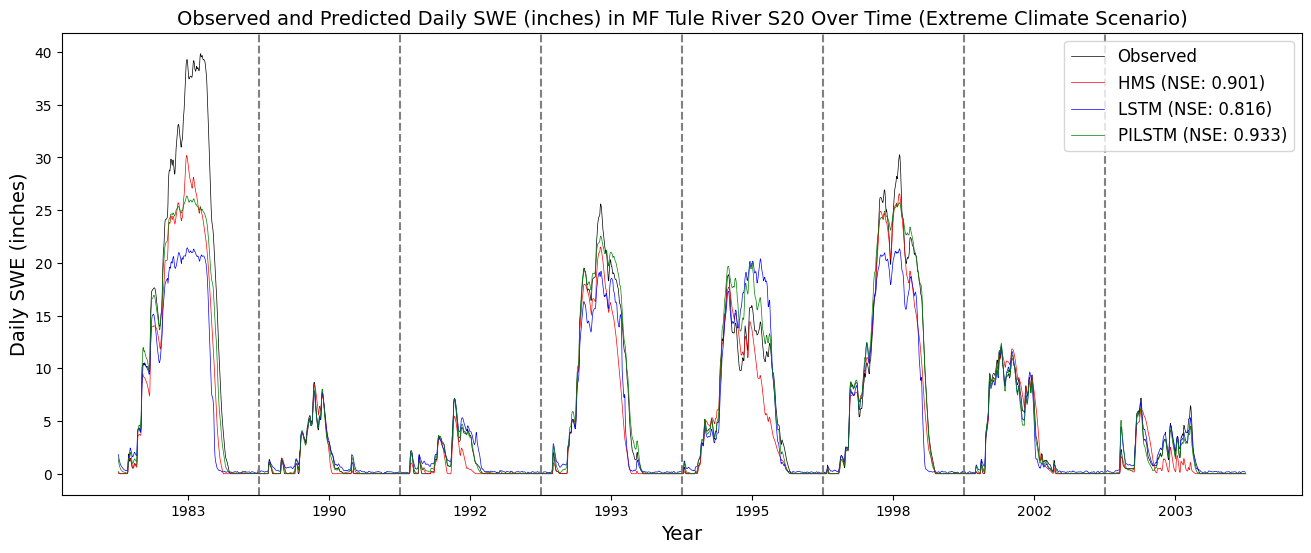

/var/folders/93/12rdf89j3ql6h5j8b_3g9ddm0000gn/T/ipykernel_65045/3262767783.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['DateTime'] = pd.to_datetime(data['DateTime'])
/Users/evanrobert/anaconda3/envs/lstm/lib/python3.10/site-packages/neuralhydrology/evaluation/metrics.py:412: RuntimeWarning: invalid value encountered in log
  qom_upper = np.log(obs[np.round(upper * len(obs)).astype(int)])
/Users/evanrobert/anaconda3/envs/lstm/lib/python3.10/site-packages/neuralhydrology/evaluation/metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)
/Users/evanrobert/anaconda3/envs/lstm/lib/python3.10/site-packages/neuralhydrology/evaluation/metrics.py:412: RuntimeWarning: invalid value encountered in log
  qom_upper = np.log(obs[np.round(upper * len(obs)).astype(int)])
/Users/evanrobert/anaconda3/envs/lstm/lib/python3.1

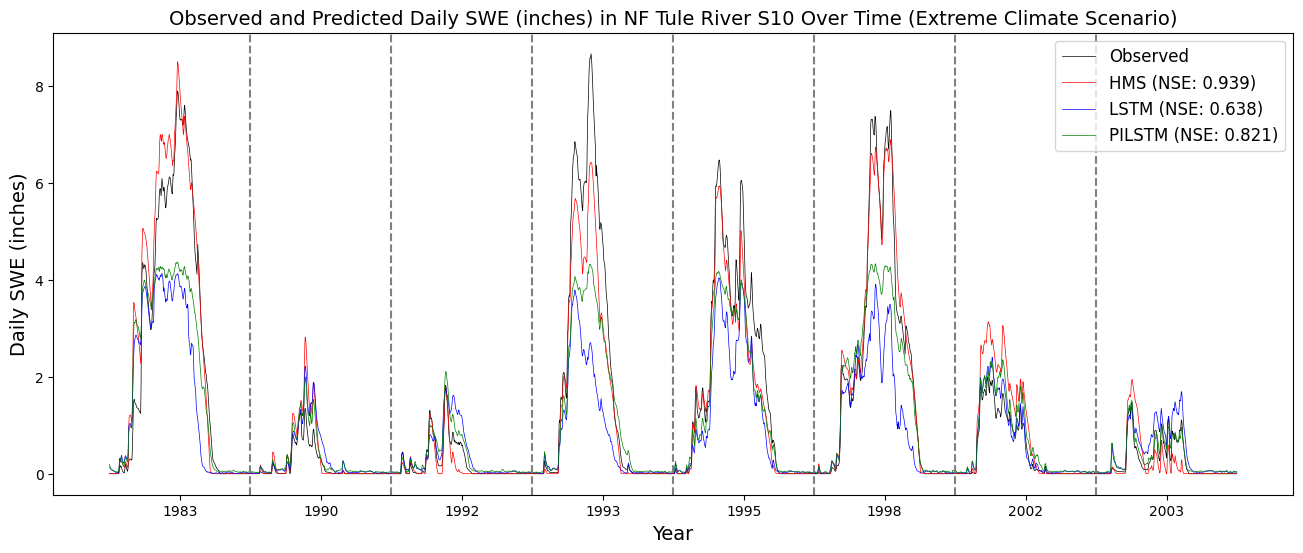

/var/folders/93/12rdf89j3ql6h5j8b_3g9ddm0000gn/T/ipykernel_65045/3262767783.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['DateTime'] = pd.to_datetime(data['DateTime'])


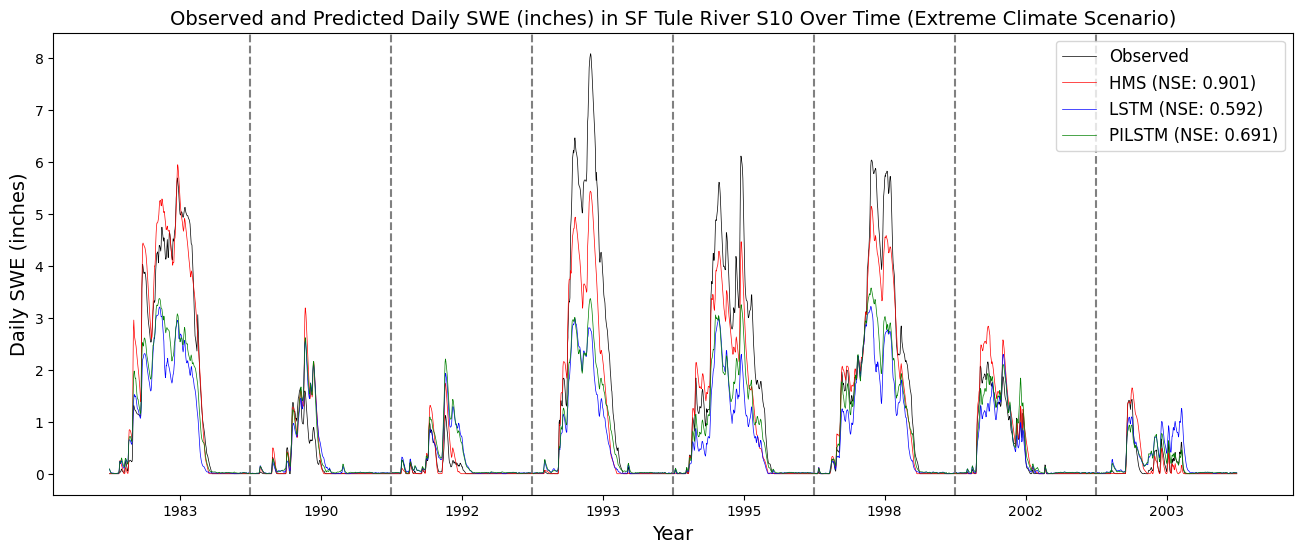

nse  perc_bias  alpha_nse  beta_nse         r
Basin             Model                                                       
MF Tule River S20 HMS       0.901428 -18.938836   0.812871 -0.119944  0.969757
                  LSTM      0.815531 -16.647751   0.737381 -0.105434  0.929220
                  HMS_LSTM  0.932721  -5.126233   0.878095 -0.032466  0.970752
NF Tule River S10 HMS       0.939275  -1.010086   0.964741 -0.006072  0.969191
                  LSTM      0.637703 -33.853786   0.554365 -0.203508  0.889702
                  HMS_LSTM  0.820865 -17.693260   0.670906 -0.106361  0.955643
SF Tule River S10 HMS       0.901251  -9.254662   0.859528 -0.053755  0.955716
                  LSTM      0.592165 -40.599187   0.494438 -0.235819  0.902281
                  HMS_LSTM  0.691498 -31.481898   0.555862 -0.182862  0.930014

In [21]:
inflow_extremes = pd.read_csv('figures_for_usace_writeup/data/inflow_extremes_test.csv')
inflow_standard = pd.read_csv('figures_for_usace_writeup/data/inflow_standard_test.csv')
mf_tuler_swe_extremes = pd.read_csv('figures_for_usace_writeup/data/SWE_MF_Tuler_S20_Extreme_test_rerun_2.csv')
mf_tuler_swe_standard = pd.read_csv('figures_for_usace_writeup/data/MF_Tuler_S20_SWE_standard_test.csv')
nf_tuler_swe_extremes = pd.read_csv('figures_for_usace_writeup/data/SWE_NF_Tuler_S10_Extreme_test_rerun_2.csv')
nf_tuler_swe_standard = pd.read_csv('figures_for_usace_writeup/data/NF_Tuler_S10_SWE_standard_test.csv')
sf_tuler_swe_extremes = pd.read_csv('figures_for_usace_writeup/data/SWE_SF_Tuler_S10_Extreme_test_rerun_2.csv')
sf_tuler_swe_standard = pd.read_csv('figures_for_usace_writeup/data/SF_Tuler_S10_SWE_standard_test.csv')

test_years=[1983, 1990, 1992, 1993, 1995, 1998, 2002, 2003]

nse, perc_bias, alpha_nse, beta_nse, r = [], [], [], [], []
plt_extremes_test(mf_tuler_swe_extremes, test_years, 'MF Tule River S20', nse, perc_bias, alpha_nse, beta_nse, r)
plt_extremes_test(nf_tuler_swe_extremes, test_years, 'NF Tule River S10', nse, perc_bias, alpha_nse, beta_nse, r)
plt_extremes_test(sf_tuler_swe_extremes, test_years, 'SF Tule River S10', nse, perc_bias, alpha_nse, beta_nse, r)

outer_index_names = ['MF Tule River S20', 'NF Tule River S10', 'SF Tule River S10']
inner_index_names = ['HMS', 'LSTM', 'HMS_LSTM']
data = np.ones(9) * -999

# Create MultiIndex
multi_index = pd.MultiIndex.from_product([outer_index_names, inner_index_names], names=['Basin', 'Model'])
metrics = pd.DataFrame(data, index=multi_index, columns=['remove_this_column'])
metrics['nse'] = nse
metrics['perc_bias'] = perc_bias
metrics['perc_bias'] *= 100
metrics['alpha_nse'] = alpha_nse
metrics['beta_nse'] = beta_nse
metrics['r'] = r
metrics = metrics.drop('remove_this_column', axis=1)

directory = './figures_for_usace_writeup/metrics1/extremes/SWE/'
file_path = os.path.join(directory, 'SWE_extremes_timeseries.csv')
os.makedirs(directory, exist_ok=True)

metrics.to_csv(file_path)
metrics

#### Inflow

In [169]:
def plt_extremes_test(data: pd.DataFrame, test_years: list[int], basin_name: str, nse: list, perc_bias: list, alpha_nse:list, beta_nse:list, r:list, fhv, fms, flv):

    ######################### PROCESS DATA #########################

    data['DateTime'] = pd.to_datetime(data['DateTime'])
    data['day_of_year'] = data['DateTime'].dt.dayofyear# Group by WaterYear and Month, then calculate the mean for each group
    data['month'] = data['DateTime'].dt.month# Group by WaterYear and Month, then calculate the mean for each group
    
    data['water_year'] = data['DateTime'].apply(lambda x: x.year if x.month < 10 else x.year + 1)
    data['day_of_water_year'] = data['day_of_year']
    data.loc[data['month'] >= 10, 'day_of_water_year'] -= 273  # Oct 1 is the 274th day of the year
    data.loc[data['month'] < 10, 'day_of_water_year'] += 92    # Jan 1 is the 1st day of the year

    # Create a new DataFrame to concatenate data for all water years
    concat_data = pd.DataFrame()

    for i, water_year in enumerate(test_years):
        year_data = data[data['water_year'] == water_year].copy()
        year_data['day_of_water_year'] += i * 366  # Adjust day_of_water_year to concatenate years
        concat_data = pd.concat([concat_data, year_data])

    # Sort by the adjusted day_of_water_year
    concat_data = concat_data.sort_values(by='day_of_water_year')

    dates = concat_data['day_of_water_year']
    obs = concat_data['Observed']
    hms = concat_data['HMS']
    lstm = concat_data['LSTM']
    lstm_hms = concat_data['LSTM_HMS']

    ######################### CALCULATE METRICS #########################
   
    hms_metrics = calculate_metrics(obs.to_xarray(), hms.to_xarray(), desired_metrics)
    lstm_metrics = calculate_metrics(obs.to_xarray(), lstm.to_xarray(), desired_metrics)
    lstm_hms_metrics = calculate_metrics(obs.to_xarray(), lstm_hms.to_xarray(), desired_metrics)

    nse += [hms_metrics['NSE'], lstm_metrics["NSE"], lstm_hms_metrics["NSE"]]
    perc_bias += [hms_metrics['percent_bias'], lstm_metrics["percent_bias"], lstm_hms_metrics["percent_bias"]]
    alpha_nse += [hms_metrics['Alpha-NSE'], lstm_metrics["Alpha-NSE"], lstm_hms_metrics["Alpha-NSE"]]
    beta_nse += [hms_metrics['Beta-NSE'], lstm_metrics["Beta-NSE"], lstm_hms_metrics["Beta-NSE"]]
    r += [hms_metrics['Pearson-r'], lstm_metrics["Pearson-r"], lstm_hms_metrics["Pearson-r"]]
    fhv += [hms_metrics['FHV'], lstm_metrics["FHV"], lstm_hms_metrics["FHV"]]
    fms += [hms_metrics['FMS'], lstm_metrics["FMS"], lstm_hms_metrics["FMS"]]
    flv += [hms_metrics['FLV'], lstm_metrics["FLV"], lstm_hms_metrics["FLV"]]

    ######################### PLOTTING #########################
    
    plt.figure(figsize=(16, 6))

    plt.plot(dates, obs, linewidth=0.5, label='Observed', color='black')
    plt.plot(dates, hms, linewidth=0.5, label=f'HMS (NSE: {round(hms_metrics["NSE"], 3)})', color='red')
    plt.plot(dates, lstm, linewidth=0.5, label=f'LSTM (NSE: {round(lstm_metrics["NSE"], 3)})', color='blue')
    plt.plot(dates, lstm_hms, linewidth=0.5, label=f'PILSTM (NSE: {round(lstm_hms_metrics["NSE"], 3)})', color='green')

    for i, water_year in enumerate(test_years[:-1]):
        year_boundary = (i + 1) * 366
        plt.axvline(year_boundary, color='grey', linestyle='--')

    tick_positions = [(i + 0.5) * 366 for i in range(len(test_years))]
    tick_labels = [str(wy) for wy in test_years]
    plt.xticks(tick_positions, tick_labels)

    plt.xlabel("Year", fontsize=14)
    plt.ylabel("Daily Inflow (cfs)", fontsize=14)
    plt.grid(False)

    title = f'Observed and Predicted Daily Inflow (cfs) Over Time (Extreme Climate Scenario)'
    plt.title(title, fontsize=14)
    plt.legend(fontsize=12, loc='upper right');

    directory = './figures_for_usace_writeup/figures1/extremes/inflow/'
    file_path = os.path.join(directory, title + '.png')
    os.makedirs(directory, exist_ok=True)
    plt.savefig(file_path, bbox_inches='tight')

    plt.show();

    return nse, perc_bias, alpha_nse, beta_nse, r, fhv, fms, flv

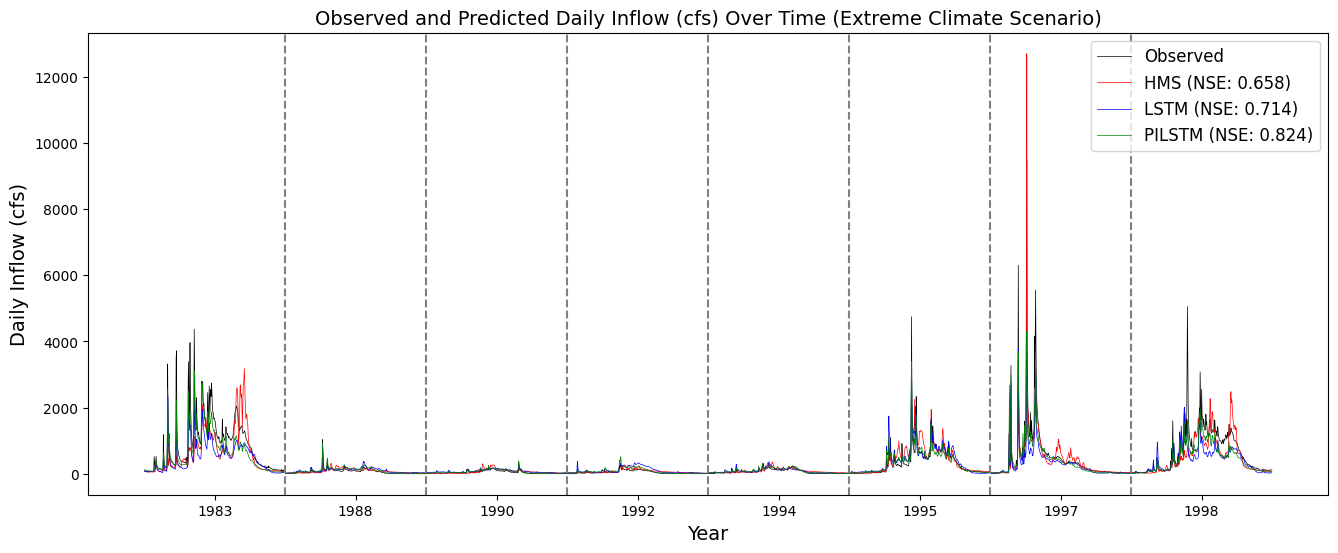

nse  perc_bias  alpha_nse  beta_nse         r        fhv  \
Model                                                                     
HMS       0.658405 -11.566289   0.835914 -0.062173  0.814093 -22.754993   
LSTM      0.713963 -21.907549   0.601155 -0.117761  0.905938 -39.779574   
HMS_LSTM  0.824471 -15.774705   0.711435 -0.084795  0.940213 -28.308162   

                fms        flv  
Model                           
HMS      -10.245349  91.958108  
LSTM     -13.802803 -30.472713  
HMS_LSTM -13.740393 -23.623413

In [170]:
inflow_extremes = pd.read_csv('figures_for_usace_writeup/data/inflow_extremes_test.csv')

test_years=[1983, 1988, 1990, 1992, 1994, 1995, 1997, 1998]

nse, perc_bias, alpha_nse, beta_nse, r, fhv, fms, flv = [], [], [], [], [], [], [], []
nse, perc_bias, alpha_nse, beta_nse, r, fhv, fms, flv = plt_extremes_test(inflow_extremes, test_years, None, nse, perc_bias, alpha_nse, beta_nse, r, fhv, fms, flv)

inner_index_names = ['HMS', 'LSTM', 'HMS_LSTM']
data = np.ones(3) * -999

# Create MultiIndex
multi_index = pd.MultiIndex.from_product([inner_index_names], names=['Model'])
metrics = pd.DataFrame(data, index=multi_index, columns=['remove_this_column'])
metrics['nse'] = nse
metrics['perc_bias'] = perc_bias
metrics['perc_bias'] *= 100
metrics['alpha_nse'] = alpha_nse
metrics['beta_nse'] = beta_nse
metrics['r'] = r
metrics['fhv'] = fhv
metrics['fms'] = fms
metrics['flv'] = flv

metrics = metrics.drop('remove_this_column', axis=1)

directory = './figures_for_usace_writeup/metrics1/extremes/inflow/'
file_path = os.path.join(directory, 'inflow_extremes_timeseries.csv')
os.makedirs(directory, exist_ok=True)
metrics.to_csv(file_path)
metrics

### SWE 5 inflow figure 5 (month of year extremes) (not using, ignore this section)

In [171]:
# mf_tuler_swe_extremes['DateTime'] = pd.to_datetime(mf_tuler_swe_extremes['DateTime'])

# #  def water_year(date):
# #     year = date.year
# #     if date.month >= 10:  # Assuming water year starts in October
# #         return year + 1
# #     else:
# #         return year

# # mf_tuler_swe_standard['WaterYear'] = mf_tuler_swe_standard['DateTime'].apply(water_year)
# mf_tuler_swe_extremes['Month'] = mf_tuler_swe_extremes['DateTime'].dt.month
# # Group by WaterYear and Month, then calculate the mean for each group
# #monthly_averages = mf_tuler_swe_standard.groupby(['WaterYear', 'Month']).mean().reset_index()

# # For plotting, you might want to calculate the overall average per month across all water years
# overall_monthly_averages = mf_tuler_swe_extremes.groupby('Month').mean().reset_index()

# bottom_three = overall_monthly_averages.tail(3)
# remaining = overall_monthly_averages.iloc[:-3]
# rearranged_df = pd.concat([bottom_three, remaining]).reset_index(drop=True)

# plt.figure(figsize=(16, 6))

# dates = rearranged_df.index
# obs = rearranged_df['Observed']
# hms = rearranged_df['HMS']
# lstm = rearranged_df['LSTM']
# lstm_hms = rearranged_df['LSTM_HMS']

# hms_nse = str(round(nse(obs, hms), 3))
# lstm_nse = str(round(nse(obs, lstm), 3))
# lstm_hms_nse = str(round(nse(obs, lstm_hms), 3))

# plt.plot(dates, obs, linewidth=0.5, label='Observed', color='black')
# plt.plot(dates, hms, linewidth=0.5, label=f'HMS (NSE: {hms_nse})', color='red')
# plt.plot(dates, lstm, linewidth=0.5, label=f'LSTM (NSE: {lstm_nse})', color='blue')
# plt.plot(dates, lstm_hms, linewidth=0.5, label=f'PILSTM (NSE: {lstm_hms_nse})', color='green')

# plt.xlabel("Year")
# plt.ylabel("Average SWE (inches)")


# # plt.setp(ax.get_xticklabels(), rotation=0, ha="center")
# plt.xticks(range(12), ['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep'])

# plt.title('Observed and Predicted Month of Year Average SWE (inches)')
# plt.legend();


for all, try to put them in template, and see if font size is ok, shape is ok, etc
for time series: on a page in word:
    plot
    plot
    plot
    caption

and thats it



metrics: want each row corresponding to a plot, columns are all metrics for it
do rows then combine them manually (?) and have name as index 
like for one figure, there will actually be 3 rows (HMS, LSTM, HMS-LSTM), so have those three rows and then a multiindex labeling where those three rows are coming from (ie NF TULER test period ... ...)

### Day of year (extremes)

#### SWE

In [22]:
def plt_day_of_year(data: pd.DataFrame, basin_name: str, nse: list, perc_bias: list, alpha_nse:list, beta_nse:list, r:list):

    ######################### PROCESS DATA #########################

    data['DateTime'] = pd.to_datetime(data['DateTime'])

    # mf_tuler_swe_standard['WaterYear'] = mf_tuler_swe_standard['DateTime'].apply(water_year)
    data['day_of_year'] = data['DateTime'].dt.dayofyear# Group by WaterYear and Month, then calculate the mean for each group
    data['month'] = data['DateTime'].dt.month# Group by WaterYear and Month, then calculate the mean for each group
    #monthly_averages = mf_tuler_swe_standard.groupby(['WaterYear', 'Month']).mean().reset_index()

    data['day_of_water_year'] = data['day_of_year']
    data.loc[data['month'] >= 10, 'day_of_water_year'] -= 273  # Oct 1 is the 274th day of the year
    data.loc[data['month'] < 10, 'day_of_water_year'] += 92    # Jan 1 is the 1st day of the year

    # For plotting, you might want to calculate the overall average per month across all water years
    daily_avg = data.groupby('day_of_water_year').mean()
    #overall_monthly_averages = mf_tuler_swe_standard.groupby('Month').mean().reset_index()

    rearranged_df = daily_avg

    dates = rearranged_df.index
    obs = rearranged_df['Observed']
    hms = rearranged_df['HMS']
    lstm = rearranged_df['LSTM']
    lstm_hms = rearranged_df['PILSTM']

    ######################### CALCULATE METRICS #########################
   
    hms_metrics = calculate_metrics(obs.to_xarray(), hms.to_xarray(), desired_metrics)
    lstm_metrics = calculate_metrics(obs.to_xarray(), lstm.to_xarray(), desired_metrics)
    lstm_hms_metrics = calculate_metrics(obs.to_xarray(), lstm_hms.to_xarray(), desired_metrics)

    nse += [hms_metrics['NSE'], lstm_metrics["NSE"], lstm_hms_metrics["NSE"]]
    perc_bias += [hms_metrics['percent_bias'], lstm_metrics["percent_bias"], lstm_hms_metrics["percent_bias"]]
    alpha_nse += [hms_metrics['Alpha-NSE'], lstm_metrics["Alpha-NSE"], lstm_hms_metrics["Alpha-NSE"]]
    beta_nse += [hms_metrics['Beta-NSE'], lstm_metrics["Beta-NSE"], lstm_hms_metrics["Beta-NSE"]]
    r += [hms_metrics['Pearson-r'], lstm_metrics["Pearson-r"], lstm_hms_metrics["Pearson-r"]]
    
    ######################### PLOTTING #########################
    plt.figure(figsize=(16, 3))

    plt.plot(dates, obs, linewidth=0.5, label='Observed', color='black')
    plt.plot(dates, hms, linewidth=0.5, label=f'HMS (NSE: {round(hms_metrics["NSE"], 3)})', color='red')
    plt.plot(dates, lstm, linewidth=0.5, label=f'LSTM (NSE: {round(lstm_metrics["NSE"], 3)})', color='blue')
    plt.plot(dates, lstm_hms, linewidth=0.5, label=f'PILSTM (NSE: {round(lstm_hms_metrics["NSE"], 3)})', color='green')

    # Define month labels from October to September
    months = ['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']
    num_days_in_water_year = 366  # Adjust for leap year if necessary

    # Generate evenly spaced positions for month labels
    ticks = list(range(0, 365, 31))
    plt.xticks(ticks=ticks, labels=months)

    plt.xlabel("Month", fontsize=14)
    plt.ylabel("Average SWE (inches)", fontsize=14)

    title = f'Observed and Predicted Day of Year Average SWE (inches) in {basin_name}'
    plt.title(title, fontsize=14)
    plt.legend(fontsize=12, loc='upper right');
    
    directory = './figures_for_usace_writeup/figures1/day_of_year_extremes/SWE/'
    file_path = os.path.join(directory, title + '.png')
    os.makedirs(directory, exist_ok=True)
    plt.savefig(file_path, bbox_inches='tight')

    plt.show()

    return nse, perc_bias, alpha_nse, beta_nse, r

/var/folders/93/12rdf89j3ql6h5j8b_3g9ddm0000gn/T/ipykernel_65045/794007021.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['DateTime'] = pd.to_datetime(data['DateTime'])


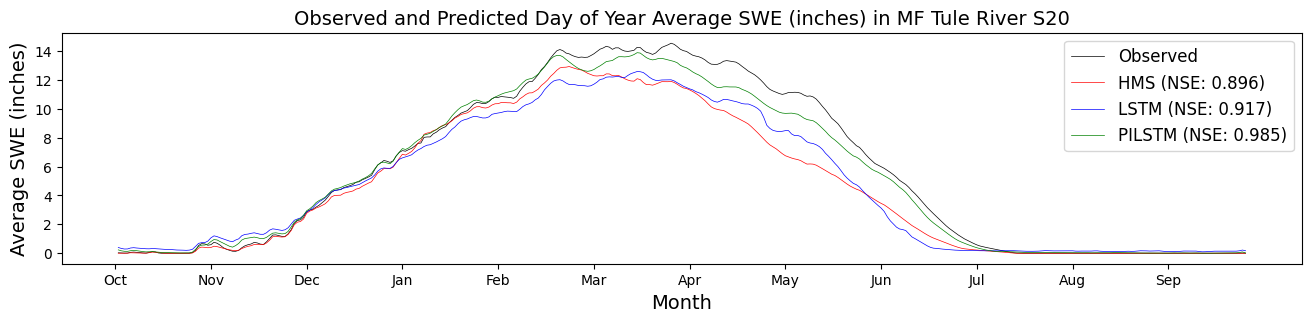

/var/folders/93/12rdf89j3ql6h5j8b_3g9ddm0000gn/T/ipykernel_65045/794007021.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['DateTime'] = pd.to_datetime(data['DateTime'])
/Users/evanrobert/anaconda3/envs/lstm/lib/python3.10/site-packages/neuralhydrology/evaluation/metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)
/Users/evanrobert/anaconda3/envs/lstm/lib/python3.10/site-packages/neuralhydrology/evaluation/metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)
/Users/evanrobert/anaconda3/envs/lstm/lib/python3.10/site-packages/neuralhydrology/evaluation/metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)


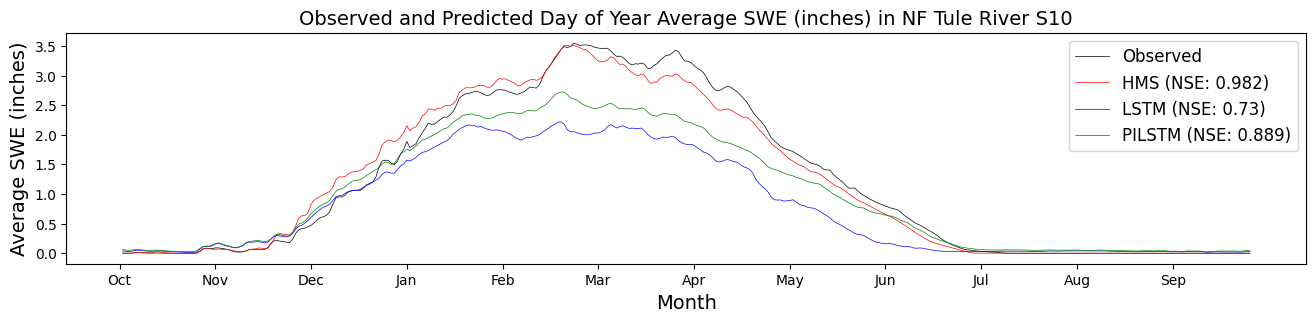

/var/folders/93/12rdf89j3ql6h5j8b_3g9ddm0000gn/T/ipykernel_65045/794007021.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['DateTime'] = pd.to_datetime(data['DateTime'])


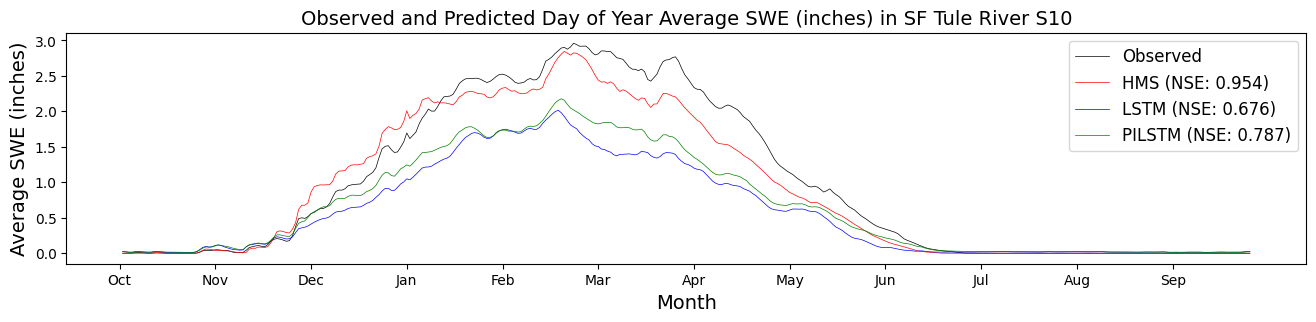

nse  perc_bias  alpha_nse  beta_nse         r
Basin             Model                                                       
MF Tule River S20 HMS       0.896143 -18.945593   0.852724 -0.196194  0.974391
                  LSTM      0.917333 -16.642289   0.839293 -0.172342  0.983832
                  HMS_LSTM  0.985471  -5.127227   0.938076 -0.053096  0.995803
NF Tule River S10 HMS       0.981813  -1.018182   0.974714 -0.009631  0.991046
                  LSTM      0.730384 -33.855487   0.651701 -0.320226  0.964893
                  HMS_LSTM  0.888987 -17.688345   0.752030 -0.167307  0.985684
SF Tule River S10 HMS       0.954197  -9.271161   0.907155 -0.084034  0.983398
                  LSTM      0.676304 -40.594285   0.594246 -0.367949  0.980081
                  HMS_LSTM  0.786889 -31.478678   0.658796 -0.285325  0.988403

In [23]:
inflow_extremes = pd.read_csv('figures_for_usace_writeup/data/inflow_extremes_test.csv')
inflow_standard = pd.read_csv('figures_for_usace_writeup/data/inflow_standard_test.csv')
mf_tuler_swe_extremes = pd.read_csv('figures_for_usace_writeup/data/SWE_MF_Tuler_S20_Extreme_test_rerun_2.csv')
mf_tuler_swe_standard = pd.read_csv('figures_for_usace_writeup/data/MF_Tuler_S20_SWE_standard_test.csv')
nf_tuler_swe_extremes = pd.read_csv('figures_for_usace_writeup/data/SWE_NF_Tuler_S10_Extreme_test_rerun_2.csv')
nf_tuler_swe_standard = pd.read_csv('figures_for_usace_writeup/data/NF_Tuler_S10_SWE_standard_test.csv')
sf_tuler_swe_extremes = pd.read_csv('figures_for_usace_writeup/data/SWE_SF_Tuler_S10_Extreme_test_rerun_2.csv')
sf_tuler_swe_standard = pd.read_csv('figures_for_usace_writeup/data/SF_Tuler_S10_SWE_standard_test.csv')

nse, perc_bias, alpha_nse, beta_nse, r = [], [], [], [], []
plt_day_of_year(mf_tuler_swe_extremes, 'MF Tule River S20', nse, perc_bias, alpha_nse, beta_nse, r)
plt_day_of_year(nf_tuler_swe_extremes, 'NF Tule River S10', nse, perc_bias, alpha_nse, beta_nse, r)
plt_day_of_year(sf_tuler_swe_extremes, 'SF Tule River S10', nse, perc_bias, alpha_nse, beta_nse, r)

outer_index_names = ['MF Tule River S20', 'NF Tule River S10', 'SF Tule River S10']
inner_index_names = ['HMS', 'LSTM', 'HMS_LSTM']
data = np.ones(9) * -999

# Create MultiIndex
multi_index = pd.MultiIndex.from_product([outer_index_names, inner_index_names], names=['Basin', 'Model'])
metrics = pd.DataFrame(data, index=multi_index, columns=['remove_this_column'])
metrics['nse'] = nse
metrics['perc_bias'] = perc_bias
metrics['perc_bias'] *= 100
metrics['alpha_nse'] = alpha_nse
metrics['beta_nse'] = beta_nse
metrics['r'] = r

metrics = metrics.drop('remove_this_column', axis=1)

directory = './figures_for_usace_writeup/metrics1/day_of_year_extremes/SWE/'
file_path = os.path.join(directory, 'SWE_day_of_year_timeseries.csv')
os.makedirs(directory, exist_ok=True)

metrics.to_csv(file_path)
metrics

#### inflow

In [ ]:
def plt_day_of_year(data: pd.DataFrame, basin_name: str, nse: list, perc_bias: list, alpha_nse:list, beta_nse:list, r:list, fhv, fms, flv):

    ######################### PROCESS DATA #########################

    data['DateTime'] = pd.to_datetime(data['DateTime'])

    # mf_tuler_swe_standard['WaterYear'] = mf_tuler_swe_standard['DateTime'].apply(water_year)
    data['day_of_year'] = data['DateTime'].dt.dayofyear# Group by WaterYear and Month, then calculate the mean for each group
    data['month'] = data['DateTime'].dt.month# Group by WaterYear and Month, then calculate the mean for each group
    #monthly_averages = mf_tuler_swe_standard.groupby(['WaterYear', 'Month']).mean().reset_index()

    data['day_of_water_year'] = data['day_of_year']
    data.loc[data['month'] >= 10, 'day_of_water_year'] -= 273  # Oct 1 is the 274th day of the year
    data.loc[data['month'] < 10, 'day_of_water_year'] += 92    # Jan 1 is the 1st day of the year

    # For plotting, you might want to calculate the overall average per month across all water years
    daily_avg = data.groupby('day_of_water_year').mean()
    #overall_monthly_averages = mf_tuler_swe_standard.groupby('Month').mean().reset_index()

    rearranged_df = daily_avg

    dates = rearranged_df.index
    obs = rearranged_df['Observed']
    hms = rearranged_df['HMS']
    lstm = rearranged_df['LSTM']
    lstm_hms = rearranged_df['LSTM_HMS']

    ######################### CALCULATE METRICS #########################
   
    hms_metrics = calculate_metrics(obs.to_xarray(), hms.to_xarray(), desired_metrics)
    lstm_metrics = calculate_metrics(obs.to_xarray(), lstm.to_xarray(), desired_metrics)
    lstm_hms_metrics = calculate_metrics(obs.to_xarray(), lstm_hms.to_xarray(), desired_metrics)

    nse += [hms_metrics['NSE'], lstm_metrics["NSE"], lstm_hms_metrics["NSE"]]
    perc_bias += [hms_metrics['percent_bias'], lstm_metrics["percent_bias"], lstm_hms_metrics["percent_bias"]]
    alpha_nse += [hms_metrics['Alpha-NSE'], lstm_metrics["Alpha-NSE"], lstm_hms_metrics["Alpha-NSE"]]
    beta_nse += [hms_metrics['Beta-NSE'], lstm_metrics["Beta-NSE"], lstm_hms_metrics["Beta-NSE"]]
    r += [hms_metrics['Pearson-r'], lstm_metrics["Pearson-r"], lstm_hms_metrics["Pearson-r"]]
    fhv += [hms_metrics['FHV'], lstm_metrics["FHV"], lstm_hms_metrics["FHV"]]
    fms += [hms_metrics['FMS'], lstm_metrics["FMS"], lstm_hms_metrics["FMS"]]
    flv += [hms_metrics['FLV'], lstm_metrics["FLV"], lstm_hms_metrics["FLV"]]
    
    ######################### PLOTTING #########################
    plt.figure(figsize=(16, 3))

    plt.plot(dates, obs, linewidth=0.5, label='Observed', color='black')
    plt.plot(dates, hms, linewidth=0.5, label=f'HMS (NSE: {round(hms_metrics["NSE"], 3)})', color='red')
    plt.plot(dates, lstm, linewidth=0.5, label=f'LSTM (NSE: {round(lstm_metrics["NSE"], 3)})', color='blue')
    plt.plot(dates, lstm_hms, linewidth=0.5, label=f'PILSTM (NSE: {round(lstm_hms_metrics["NSE"], 3)})', color='green')

    # Define month labels from October to September
    months = ['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']
    num_days_in_water_year = 366  # Adjust for leap year if necessary

    # Generate evenly spaced positions for month labels
    ticks = list(range(0, 365, 31))
    plt.xticks(ticks=ticks, labels=months)

    plt.xlabel("Month", fontsize=14)
    plt.ylabel("Average Inflow (cfs)", fontsize=14)

    title = f'Observed and Predicted Day of Year Average Inflow (cfs)'
    plt.title(title, fontsize=14)
    plt.legend(fontsize=12, loc='upper right');
    
    directory = './figures_for_usace_writeup/figures1/day_of_year_extremes/inflow/'
    file_path = os.path.join(directory, title + '.png')
    os.makedirs(directory, exist_ok=True)
    plt.savefig(file_path, bbox_inches='tight')

    plt.show()

    return nse, perc_bias, alpha_nse, beta_nse, r, fhv, fms, flv

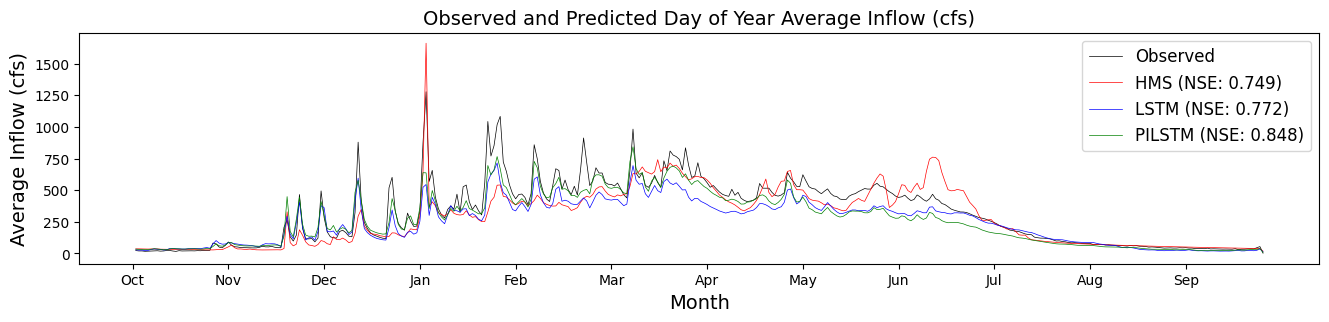

nse  perc_bias  alpha_nse  beta_nse         r        fhv  \
Model                                                                     
HMS       0.748696 -11.554084   0.906965 -0.146588  0.878077 -15.029161   
LSTM      0.771553 -21.897407   0.686649 -0.277814  0.961351 -37.749353   
HMS_LSTM  0.847532 -15.777627   0.812483 -0.200172  0.952469 -28.749827   

                fms        flv  
Model                           
HMS        6.306759  72.293877  
LSTM     -21.938662  66.550634  
HMS_LSTM   0.595813  46.803889

In [ ]:
inflow_extremes = pd.read_csv('figures_for_usace_writeup/data/inflow_extremes_test.csv')

nse, perc_bias, alpha_nse, beta_nse, r, fhv, fms, flv = [], [], [], [], [], [], [], []
nse, perc_bias, alpha_nse, beta_nse, r, fhv, fms, flv = plt_day_of_year(inflow_extremes, None, nse, perc_bias, alpha_nse, beta_nse, r, fhv, fms, flv)

inner_index_names = ['HMS', 'LSTM', 'HMS_LSTM']
data = np.ones(3) * -999

# Create MultiIndex
multi_index = pd.MultiIndex.from_product([inner_index_names], names=['Model'])
metrics = pd.DataFrame(data, index=multi_index, columns=['remove_this_column'])
metrics['nse'] = nse
metrics['perc_bias'] = perc_bias
metrics['perc_bias'] *= 100
metrics['alpha_nse'] = alpha_nse
metrics['beta_nse'] = beta_nse
metrics['r'] = r
metrics['fhv'] = fhv
metrics['fms'] = fms
metrics['flv'] = flv

metrics = metrics.drop('remove_this_column', axis=1)

directory = './figures_for_usace_writeup/metrics1/day_of_year_extremes/inflow/'
file_path = os.path.join(directory, 'inflow_day_of_year_timeseries.csv')
os.makedirs(directory, exist_ok=True)

metrics.to_csv(file_path)
metrics

### Day of year (extremes) (wet + dry seperate)

#### SWE

In [24]:
def plt_day_of_year(desired_years: list, data: pd.DataFrame, basin_name: str, nse: list, perc_bias: list, alpha_nse:list, beta_nse:list, r:list):

    ######################### SELECT YEARS #########################

    data['DateTime'] = pd.to_datetime(data['DateTime'])

    def water_year(date):
        year = date.year
        if date.month >= 10:  # Assuming water year starts in October
            return year + 1
        else:
            return year

    data['WaterYear'] = data['DateTime'].apply(water_year)
    data = data[data['WaterYear'].isin(desired_years)]

    ######################### PROCESS DATA #########################

    # mf_tuler_swe_standard['WaterYear'] = mf_tuler_swe_standard['DateTime'].apply(water_year)
    data['day_of_year'] = data['DateTime'].dt.dayofyear# Group by WaterYear and Month, then calculate the mean for each group
    data['month'] = data['DateTime'].dt.month# Group by WaterYear and Month, then calculate the mean for each group
    #monthly_averages = mf_tuler_swe_standard.groupby(['WaterYear', 'Month']).mean().reset_index()

    data['day_of_water_year'] = data['day_of_year']
    data.loc[data['month'] >= 10, 'day_of_water_year'] -= 273  # Oct 1 is the 274th day of the year
    data.loc[data['month'] < 10, 'day_of_water_year'] += 92    # Jan 1 is the 1st day of the year

    # For plotting, you might want to calculate the overall average per month across all water years
    daily_avg = data.groupby('day_of_water_year').mean()
    #overall_monthly_averages = mf_tuler_swe_standard.groupby('Month').mean().reset_index()

    rearranged_df = daily_avg

    dates = rearranged_df.index
    obs = rearranged_df['Observed']
    hms = rearranged_df['HMS']
    lstm = rearranged_df['LSTM']
    lstm_hms = rearranged_df['PILSTM']

    ######################### CALCULATE METRICS #########################
   
    hms_metrics = calculate_metrics(obs.to_xarray(), hms.to_xarray(), desired_metrics)
    lstm_metrics = calculate_metrics(obs.to_xarray(), lstm.to_xarray(), desired_metrics)
    lstm_hms_metrics = calculate_metrics(obs.to_xarray(), lstm_hms.to_xarray(), desired_metrics)

    nse += [hms_metrics['NSE'], lstm_metrics["NSE"], lstm_hms_metrics["NSE"]]
    perc_bias += [hms_metrics['percent_bias'], lstm_metrics["percent_bias"], lstm_hms_metrics["percent_bias"]]
    alpha_nse += [hms_metrics['Alpha-NSE'], lstm_metrics["Alpha-NSE"], lstm_hms_metrics["Alpha-NSE"]]
    beta_nse += [hms_metrics['Beta-NSE'], lstm_metrics["Beta-NSE"], lstm_hms_metrics["Beta-NSE"]]
    r += [hms_metrics['Pearson-r'], lstm_metrics["Pearson-r"], lstm_hms_metrics["Pearson-r"]]
    
    ######################### PLOTTING #########################
    plt.figure(figsize=(16, 3))

    plt.plot(dates, obs, linewidth=0.5, label='Observed', color='black')
    plt.plot(dates, hms, linewidth=0.5, label=f'HMS (NSE: {round(hms_metrics["NSE"], 3)})', color='red')
    plt.plot(dates, lstm, linewidth=0.5, label=f'LSTM (NSE: {round(lstm_metrics["NSE"], 3)})', color='blue')
    plt.plot(dates, lstm_hms, linewidth=0.5, label=f'PILSTM (NSE: {round(lstm_hms_metrics["NSE"], 3)})', color='green')

    # Define month labels from October to September
    months = ['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']
    num_days_in_water_year = 366  # Adjust for leap year if necessary

    # Generate evenly spaced positions for month labels
    ticks = list(range(0, 365, 31))
    plt.xticks(ticks=ticks, labels=months)

    plt.xlabel("Month", fontsize=14)
    plt.ylabel("Average SWE (inches)", fontsize=14)

    title = f'Observed and Predicted Day of Year Average SWE (inches) in {basin_name}'
    plt.title(title, fontsize=14)
    plt.legend(fontsize=12, loc='upper right');
    
    directory = './figures_for_usace_writeup/figures1/day_of_year_extremes_wet_dry_only/SWE/'
    file_path = os.path.join(directory, title + '.png')
    os.makedirs(directory, exist_ok=True)
    plt.savefig(file_path, bbox_inches='tight')

    plt.show()

    return nse, perc_bias, alpha_nse, beta_nse, r

0


/var/folders/93/12rdf89j3ql6h5j8b_3g9ddm0000gn/T/ipykernel_65045/1528813620.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['DateTime'] = pd.to_datetime(data['DateTime'])
/var/folders/93/12rdf89j3ql6h5j8b_3g9ddm0000gn/T/ipykernel_65045/1528813620.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['day_of_year'] = data['DateTime'].dt.dayofyear# Group by WaterYear and Month, then calculate the mean for each group
/var/folders/93/12rdf89j3ql6h5j8b_3g9ddm0000gn/T/ipykernel_65045/1528813620.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

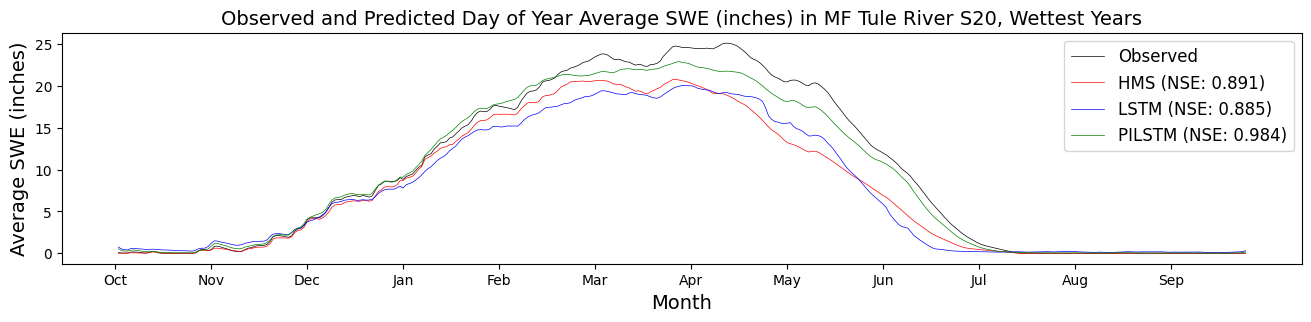

3


/var/folders/93/12rdf89j3ql6h5j8b_3g9ddm0000gn/T/ipykernel_65045/1528813620.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['day_of_year'] = data['DateTime'].dt.dayofyear# Group by WaterYear and Month, then calculate the mean for each group
/var/folders/93/12rdf89j3ql6h5j8b_3g9ddm0000gn/T/ipykernel_65045/1528813620.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month'] = data['DateTime'].dt.month# Group by WaterYear and Month, then calculate the mean for each group
/var/folders/93/12rd

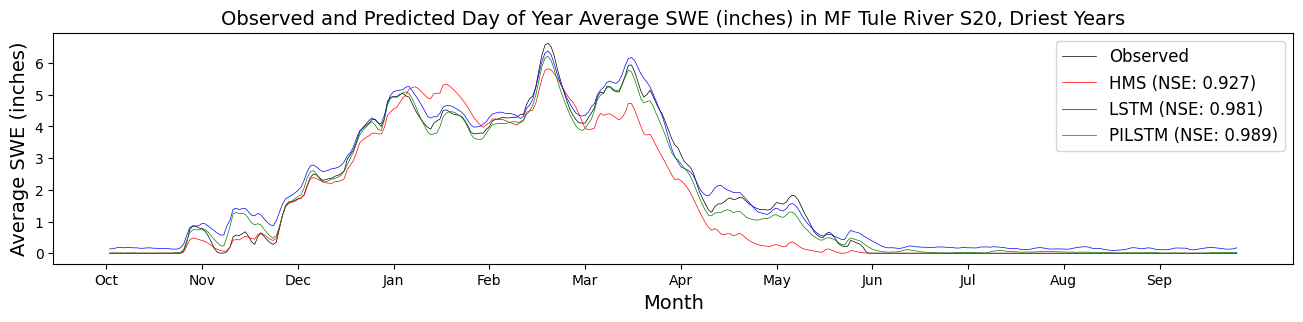

6


/var/folders/93/12rdf89j3ql6h5j8b_3g9ddm0000gn/T/ipykernel_65045/1528813620.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['DateTime'] = pd.to_datetime(data['DateTime'])
/var/folders/93/12rdf89j3ql6h5j8b_3g9ddm0000gn/T/ipykernel_65045/1528813620.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['day_of_year'] = data['DateTime'].dt.dayofyear# Group by WaterYear and Month, then calculate the mean for each group
/var/folders/93/12rdf89j3ql6h5j8b_3g9ddm0000gn/T/ipykernel_65045/1528813620.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

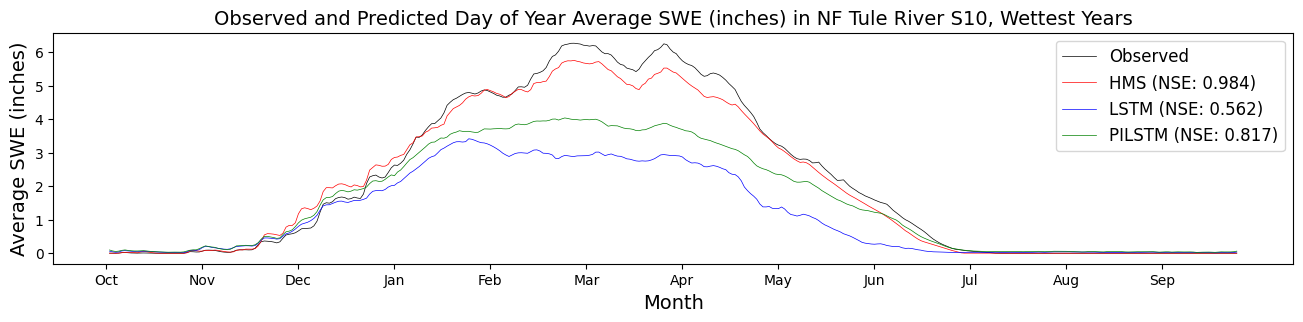

9


/var/folders/93/12rdf89j3ql6h5j8b_3g9ddm0000gn/T/ipykernel_65045/1528813620.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['day_of_year'] = data['DateTime'].dt.dayofyear# Group by WaterYear and Month, then calculate the mean for each group
/var/folders/93/12rdf89j3ql6h5j8b_3g9ddm0000gn/T/ipykernel_65045/1528813620.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month'] = data['DateTime'].dt.month# Group by WaterYear and Month, then calculate the mean for each group
/var/folders/93/12rd

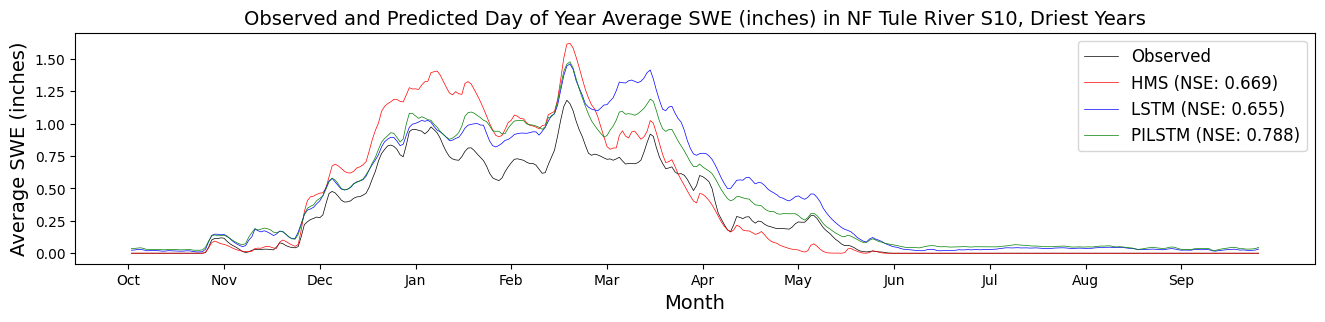

12


/var/folders/93/12rdf89j3ql6h5j8b_3g9ddm0000gn/T/ipykernel_65045/1528813620.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['DateTime'] = pd.to_datetime(data['DateTime'])
/var/folders/93/12rdf89j3ql6h5j8b_3g9ddm0000gn/T/ipykernel_65045/1528813620.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['day_of_year'] = data['DateTime'].dt.dayofyear# Group by WaterYear and Month, then calculate the mean for each group
/var/folders/93/12rdf89j3ql6h5j8b_3g9ddm0000gn/T/ipykernel_65045/1528813620.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

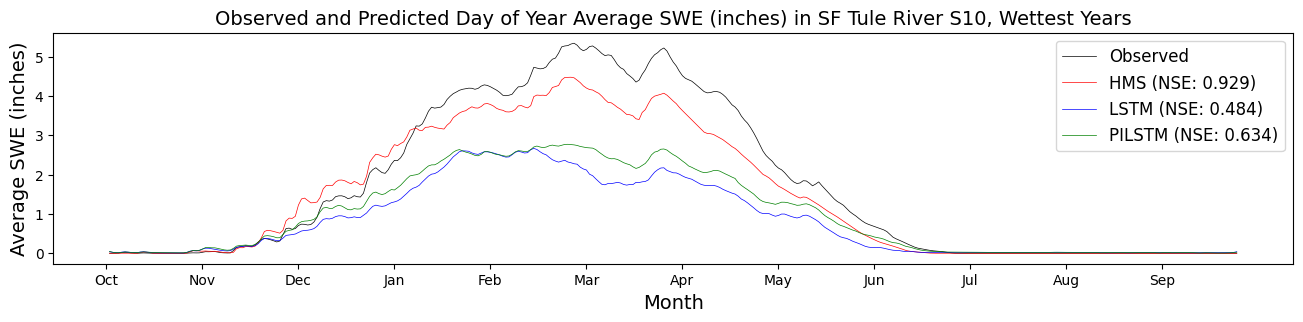

15


/var/folders/93/12rdf89j3ql6h5j8b_3g9ddm0000gn/T/ipykernel_65045/1528813620.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['day_of_year'] = data['DateTime'].dt.dayofyear# Group by WaterYear and Month, then calculate the mean for each group
/var/folders/93/12rdf89j3ql6h5j8b_3g9ddm0000gn/T/ipykernel_65045/1528813620.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month'] = data['DateTime'].dt.month# Group by WaterYear and Month, then calculate the mean for each group
/var/folders/93/12rd

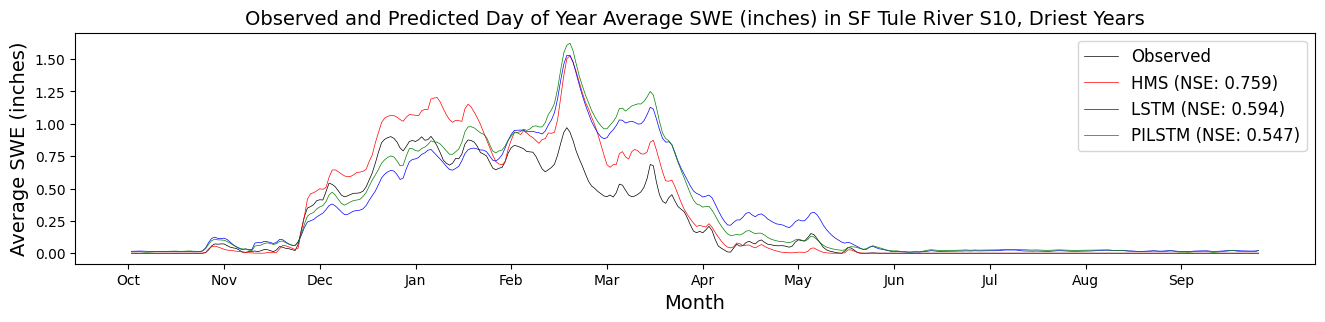

18


nse  perc_bias  alpha_nse  \
Basin             Year Type Model                                      
MF Tule River S20 Wet Years HMS       0.891257 -20.051386   0.830512   
                            LSTM      0.884882 -21.482101   0.804039   
                            HMS_LSTM  0.983946  -5.535244   0.932106   
                  Dry Years HMS       0.926535 -12.849859   0.972428   
                            LSTM      0.981306  10.113755   0.983578   
                            HMS_LSTM  0.988973  -2.871847   0.956868   
NF Tule River S10 Wet Years HMS       0.983763  -4.989232   0.926633   
                            LSTM      0.561706 -44.841859   0.544079   
                            HMS_LSTM  0.817127 -25.580606   0.674919   
                  Dry Years HMS       0.668509  28.825912   1.440689   
                            LSTM      0.655414  48.675353   1.308345   
                            HMS_LSTM  0.788249  41.589528   1.240124   
SF Tule River S10 Wet Years HMS       0.929453 -14.787973   0.826491   
                            LSTM      0.484420 -51.170478   0.476854   
                            HMS_LSTM  0.634347 -41.392695   0.537347   
                  Dry Years HMS       0.758646  30.832577   1.367525   
                            LSTM      0.593909  36.390021   1.221377   
                            HMS_LSTM  0.546984  40.675994   1.343515   

                                      beta_nse         r  
Basin             Year Type Model                         
MF Tule River S20 Wet Years HMS      -0.204227  0.976937  
                            LSTM     -0.218799  0.982063  
                            HMS_LSTM -0.056378  0.995566  
                  Dry Years HMS      -0.111106  0.968964  
                            LSTM      0.087449  0.994522  
                            HMS_LSTM -0.024831  0.995532  
NF Tule River S10 Wet Years HMS      -0.046798  0.995325  
                            LSTM     -0.420606  0.950815  
                            HMS_LSTM -0.239940  0.985462  
                  Dry Years HMS       0.241271  0.972557  
                            LSTM      0.407410  0.968079  
                            HMS_LSTM  0.348102  0.986728  
SF Tule River S10 Wet Years HMS      -0.132030  0.986080  
                            LSTM     -0.456860  0.965213  
                            HMS_LSTM -0.369562  0.986015  
                  Dry Years HMS       0.229827  0.980454  
                            LSTM      0.271253  0.883940  
                            HMS_LSTM  0.303200  0.909535

In [26]:
inflow_extremes = pd.read_csv('figures_for_usace_writeup/data/inflow_extremes_test.csv')
inflow_standard = pd.read_csv('figures_for_usace_writeup/data/inflow_standard_test.csv')
mf_tuler_swe_extremes = pd.read_csv('figures_for_usace_writeup/data/SWE_MF_Tuler_S20_Extreme_test_rerun_2.csv')
mf_tuler_swe_standard = pd.read_csv('figures_for_usace_writeup/data/MF_Tuler_S20_SWE_standard_test.csv')
nf_tuler_swe_extremes = pd.read_csv('figures_for_usace_writeup/data/SWE_NF_Tuler_S10_Extreme_test_rerun_2.csv')
nf_tuler_swe_standard = pd.read_csv('figures_for_usace_writeup/data/NF_Tuler_S10_SWE_standard_test.csv')
sf_tuler_swe_extremes = pd.read_csv('figures_for_usace_writeup/data/SWE_SF_Tuler_S10_Extreme_test_rerun_2.csv')
sf_tuler_swe_standard = pd.read_csv('figures_for_usace_writeup/data/SF_Tuler_S10_SWE_standard_test.csv')

nse, perc_bias, alpha_nse, beta_nse, r = [], [], [], [], []

# swe_extremes_years = [1983, 1988, 1990, 1992, 1994, 1995, 1997, 1998]
swe_extremes_years_wet = [1983, 1993, 1995, 1998]
swe_extremes_years_dry = [1990, 1992, 2002, 2003]

print(len(nse))
plt_day_of_year(swe_extremes_years_wet, mf_tuler_swe_extremes, 'MF Tule River S20, Wettest Years', nse, perc_bias, alpha_nse, beta_nse, r)
print(len(nse))
plt_day_of_year(swe_extremes_years_dry, mf_tuler_swe_extremes, 'MF Tule River S20, Driest Years', nse, perc_bias, alpha_nse, beta_nse, r)
print(len(nse))

plt_day_of_year(swe_extremes_years_wet, nf_tuler_swe_extremes, 'NF Tule River S10, Wettest Years', nse, perc_bias, alpha_nse, beta_nse, r)
print(len(nse))
plt_day_of_year(swe_extremes_years_dry, nf_tuler_swe_extremes, 'NF Tule River S10, Driest Years', nse, perc_bias, alpha_nse, beta_nse, r)
print(len(nse))

plt_day_of_year(swe_extremes_years_wet, sf_tuler_swe_extremes, 'SF Tule River S10, Wettest Years', nse, perc_bias, alpha_nse, beta_nse, r)
print(len(nse))
plt_day_of_year(swe_extremes_years_dry, sf_tuler_swe_extremes, 'SF Tule River S10, Driest Years', nse, perc_bias, alpha_nse, beta_nse, r)
print(len(nse))

outer_index_names = ['MF Tule River S20', 'NF Tule River S10', 'SF Tule River S10']
middle_index_names = ['Wet Years', 'Dry Years']
inner_index_names = ['HMS', 'LSTM', 'HMS_LSTM']
data = np.ones(18) * -999

# Create MultiIndex
multi_index = pd.MultiIndex.from_product([outer_index_names, middle_index_names, inner_index_names], names=['Basin', 'Year Type','Model'])
metrics = pd.DataFrame(data, index=multi_index, columns=['remove_this_column'])
metrics['nse'] = nse
metrics['perc_bias'] = perc_bias
metrics['perc_bias'] *= 100
metrics['alpha_nse'] = alpha_nse
metrics['beta_nse'] = beta_nse
metrics['r'] = r

metrics = metrics.drop('remove_this_column', axis=1)

directory = './figures_for_usace_writeup/metrics1/day_of_year_extremes_wet_dry_only/SWE/'
file_path = os.path.join(directory, 'SWE_day_of_year_timeseries.csv')
os.makedirs(directory, exist_ok=True)

metrics.to_csv(file_path)
metrics

#### inflow

In [14]:
def plt_day_of_year(desired_years: list, data: pd.DataFrame, basin_name: str, nse: list, perc_bias: list, alpha_nse:list, beta_nse:list, r:list, fhv, fms, flv):

    ######################### SELECT YEARS #########################

    data['DateTime'] = pd.to_datetime(data['DateTime'])

    def water_year(date):
        year = date.year
        if date.month >= 10:  # Assuming water year starts in October
            return year + 1
        else:
            return year

    data['WaterYear'] = data['DateTime'].apply(water_year)
    data = data[data['WaterYear'].isin(desired_years)]

    ######################### PROCESS DATA #########################

    data['DateTime'] = pd.to_datetime(data['DateTime'])

    # mf_tuler_swe_standard['WaterYear'] = mf_tuler_swe_standard['DateTime'].apply(water_year)
    data['day_of_year'] = data['DateTime'].dt.dayofyear# Group by WaterYear and Month, then calculate the mean for each group
    data['month'] = data['DateTime'].dt.month# Group by WaterYear and Month, then calculate the mean for each group
    #monthly_averages = mf_tuler_swe_standard.groupby(['WaterYear', 'Month']).mean().reset_index()

    data['day_of_water_year'] = data['day_of_year']
    data.loc[data['month'] >= 10, 'day_of_water_year'] -= 273  # Oct 1 is the 274th day of the year
    data.loc[data['month'] < 10, 'day_of_water_year'] += 92    # Jan 1 is the 1st day of the year

    # For plotting, you might want to calculate the overall average per month across all water years
    daily_avg = data.groupby('day_of_water_year').mean()
    #overall_monthly_averages = mf_tuler_swe_standard.groupby('Month').mean().reset_index()

    rearranged_df = daily_avg

    dates = rearranged_df.index
    obs = rearranged_df['Observed']
    hms = rearranged_df['HMS']
    lstm = rearranged_df['LSTM']
    lstm_hms = rearranged_df['LSTM_HMS']

    ######################### CALCULATE METRICS #########################
   
    hms_metrics = calculate_metrics(obs.to_xarray(), hms.to_xarray(), desired_metrics)
    lstm_metrics = calculate_metrics(obs.to_xarray(), lstm.to_xarray(), desired_metrics)
    lstm_hms_metrics = calculate_metrics(obs.to_xarray(), lstm_hms.to_xarray(), desired_metrics)

    nse += [hms_metrics['NSE'], lstm_metrics["NSE"], lstm_hms_metrics["NSE"]]
    perc_bias += [hms_metrics['percent_bias'], lstm_metrics["percent_bias"], lstm_hms_metrics["percent_bias"]]
    alpha_nse += [hms_metrics['Alpha-NSE'], lstm_metrics["Alpha-NSE"], lstm_hms_metrics["Alpha-NSE"]]
    beta_nse += [hms_metrics['Beta-NSE'], lstm_metrics["Beta-NSE"], lstm_hms_metrics["Beta-NSE"]]
    r += [hms_metrics['Pearson-r'], lstm_metrics["Pearson-r"], lstm_hms_metrics["Pearson-r"]]
    fhv += [hms_metrics['FHV'], lstm_metrics["FHV"], lstm_hms_metrics["FHV"]]
    fms += [hms_metrics['FMS'], lstm_metrics["FMS"], lstm_hms_metrics["FMS"]]
    flv += [hms_metrics['FLV'], lstm_metrics["FLV"], lstm_hms_metrics["FLV"]]
    
    ######################### PLOTTING #########################
    plt.figure(figsize=(16, 3))

    plt.plot(dates, obs, linewidth=0.5, label='Observed', color='black')
    plt.plot(dates, hms, linewidth=0.5, label=f'HMS (NSE: {round(hms_metrics["NSE"], 3)})', color='red')
    plt.plot(dates, lstm, linewidth=0.5, label=f'LSTM (NSE: {round(lstm_metrics["NSE"], 3)})', color='blue')
    plt.plot(dates, lstm_hms, linewidth=0.5, label=f'PILSTM (NSE: {round(lstm_hms_metrics["NSE"], 3)})', color='green')

    # Define month labels from October to September
    months = ['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']
    num_days_in_water_year = 366  # Adjust for leap year if necessary

    # Generate evenly spaced positions for month labels
    ticks = list(range(0, 365, 31))
    plt.xticks(ticks=ticks, labels=months)

    plt.xlabel("Month", fontsize=14)
    plt.ylabel("Average Inflow (cfs)", fontsize=14)

    title = f'Observed and Predicted Day of Year Average Inflow (cfs), {basin_name}'
    plt.title(title, fontsize=14)
    plt.legend(fontsize=12, loc='upper right');
    
    directory = './figures_for_usace_writeup/figures1/day_of_year_extremes_wet_dry_only/inflow/'
    file_path = os.path.join(directory, title + '.png')
    os.makedirs(directory, exist_ok=True)
    plt.savefig(file_path, bbox_inches='tight')

    plt.show()

    return nse, perc_bias, alpha_nse, beta_nse, r, fhv, fms, flv

/var/folders/93/12rdf89j3ql6h5j8b_3g9ddm0000gn/T/ipykernel_65045/626657970.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DateTime'] = pd.to_datetime(data['DateTime'])
/var/folders/93/12rdf89j3ql6h5j8b_3g9ddm0000gn/T/ipykernel_65045/626657970.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['day_of_year'] = data['DateTime'].dt.dayofyear# Group by WaterYear and Month, then calculate the mean for each group
/var/folders/93/12rdf89j3ql6h5j8b_3g9ddm0000gn/T/ipykernel_65045/626657970.py:23: 

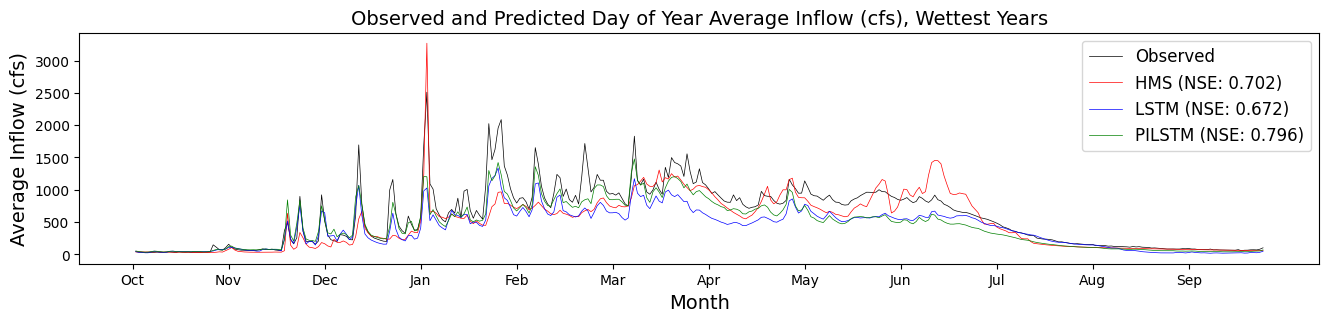

/var/folders/93/12rdf89j3ql6h5j8b_3g9ddm0000gn/T/ipykernel_65045/626657970.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DateTime'] = pd.to_datetime(data['DateTime'])
/var/folders/93/12rdf89j3ql6h5j8b_3g9ddm0000gn/T/ipykernel_65045/626657970.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['day_of_year'] = data['DateTime'].dt.dayofyear# Group by WaterYear and Month, then calculate the mean for each group
/var/folders/93/12rdf89j3ql6h5j8b_3g9ddm0000gn/T/ipykernel_65045/626657970.py:23: 

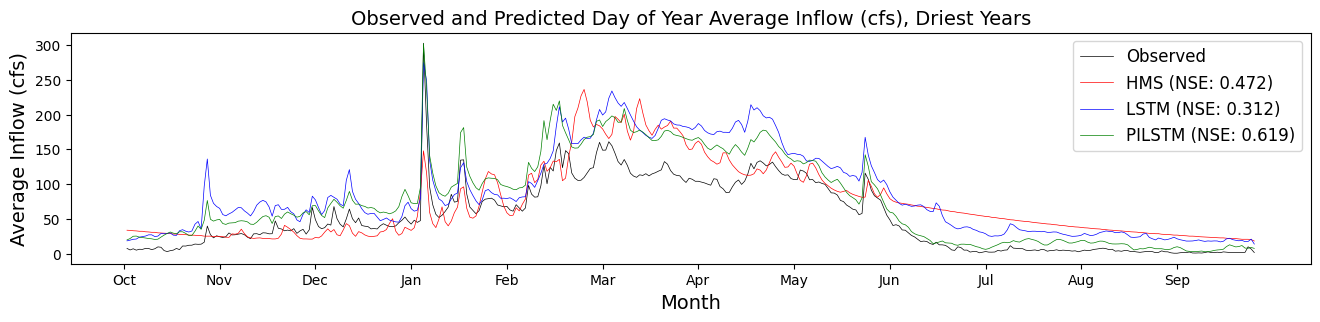

nse  perc_bias  alpha_nse  beta_nse         r  \
Year Type Model                                                          
Wet Years HMS       0.701862 -16.069245   0.893144 -0.201962  0.862323   
          LSTM      0.671824 -29.826613   0.643039 -0.374868  0.953169   
          HMS_LSTM  0.795516 -21.419151   0.763143 -0.269201  0.950263   
Dry Years HMS       0.472242  37.547094   1.097629  0.410051  0.840527   
          LSTM      0.312063  64.500908   1.270610  0.704412  0.953365   
          HMS_LSTM  0.618926  45.640788   1.290078  0.498442  0.981208   

                          fhv        fms        flv  
Year Type Model                                      
Wet Years HMS      -16.397719  15.920173  32.331550  
          LSTM     -40.847062 -19.378055  -0.856291  
          HMS_LSTM -32.892519   3.886609  39.575619  
Dry Years HMS       19.841941 -47.202219  74.654134  
          LSTM      28.824586 -40.391925  56.187471  
          HMS_LSTM  24.669067 -24.606686   1.608354

In [15]:
inflow_extremes_years_wet = [1983, 1995, 1997, 1998]
inflow_extremes_years_dry = [1988, 1990, 1992, 1994]

inflow_extremes = pd.read_csv('figures_for_usace_writeup/data/inflow_extremes_test.csv')

nse, perc_bias, alpha_nse, beta_nse, r, fhv, fms, flv = [], [], [], [], [], [], [], []
nse, perc_bias, alpha_nse, beta_nse, r, fhv, fms, flv = plt_day_of_year(inflow_extremes_years_wet, inflow_extremes, 'Wettest Years', nse, perc_bias, alpha_nse, beta_nse, r, fhv, fms, flv)
nse, perc_bias, alpha_nse, beta_nse, r, fhv, fms, flv = plt_day_of_year(inflow_extremes_years_dry, inflow_extremes, 'Driest Years', nse, perc_bias, alpha_nse, beta_nse, r, fhv, fms, flv)

middle_index_names = ['Wet Years', 'Dry Years']
inner_index_names = ['HMS', 'LSTM', 'HMS_LSTM']
data = np.ones(6) * -999

# Create MultiIndex
multi_index = pd.MultiIndex.from_product([middle_index_names, inner_index_names], names=['Year Type', 'Model'])
metrics = pd.DataFrame(data, index=multi_index, columns=['remove_this_column'])
metrics['nse'] = nse
metrics['perc_bias'] = perc_bias
metrics['perc_bias'] *= 100
metrics['alpha_nse'] = alpha_nse
metrics['beta_nse'] = beta_nse
metrics['r'] = r
metrics['fhv'] = fhv
metrics['fms'] = fms
metrics['flv'] = flv

metrics = metrics.drop('remove_this_column', axis=1)

directory = './figures_for_usace_writeup/metrics1/day_of_year_extremes_wet_dry_only/inflow/'
file_path = os.path.join(directory, 'inflow_day_of_year_timeseries.csv')
os.makedirs(directory, exist_ok=True)

metrics.to_csv(file_path)
metrics

### single wettest/driest for extremes

#### SWE

In [37]:
def plt_wet_dry_years_extremes(data: pd.DataFrame, selected_years: int, basin_name: str, nse: list, perc_bias: list, alpha_nse:list, beta_nse:list, r:list):
        
    ######################### PROCESS DATA #########################
    
    data['DateTime'] = pd.to_datetime(data['DateTime'])

    def water_year(date):
        year = date.year
        if date.month >= 10:  # Assuming water year starts in October
            return year + 1
        else:
            return year

    data['WaterYear'] = data['DateTime'].apply(water_year)

    # '''!!!!!!!!!!!'''
    # #IMPORTANT!!!! MAKE SURE THIS FILTERING IS CORRECT!!!!! the date cutoff of the test years
    # #data = data[data['WaterYear'] >= test_cutof_year]
    # data_no_dt = data.drop(columns=['DateTime'])
    # # Group by WaterYear and sum the values
    # water_year_sums = data_no_dt.groupby('WaterYear').sum().reset_index()
    # # Sort by the observed values
    # sorted_water_year_sums = water_year_sums.sort_values(by='Observed', ascending=False)
    # # Get the 2 wettest years
    # wettest_years = sorted_water_year_sums.head(2)['WaterYear']
    # # Get the 2 driest years
    # driest_years = sorted_water_year_sums.tail(2)['WaterYear']
    # # Combine wettest and driest years
    # selected_years = pd.concat([wettest_years, driest_years])
    print(selected_years)
    print()
    # Filter the original DataFrame to include only the selected years
    filtered_df = data[data['WaterYear'].isin(selected_years)]
    # Plotting the data for the selected years
    for i, year in enumerate(selected_years):
        
        data_swe_standard_year = filtered_df[filtered_df['WaterYear'] == year].copy()
        data_swe_standard_year['DateTime'] = pd.to_datetime(data_swe_standard_year['DateTime'])

        fig, ax = plt.subplots(figsize=(16, 3))

        dates = data_swe_standard_year['DateTime']
        obs = data_swe_standard_year['Observed']
        hms = data_swe_standard_year['HMS']
        lstm = data_swe_standard_year['LSTM']
        lstm_hms = data_swe_standard_year['PILSTM']

        ######################### CALCULATE METRICS #########################

        hms_metrics = calculate_metrics(obs.to_xarray(), hms.to_xarray(), desired_metrics)
        lstm_metrics = calculate_metrics(obs.to_xarray(), lstm.to_xarray(), desired_metrics)
        lstm_hms_metrics = calculate_metrics(obs.to_xarray(), lstm_hms.to_xarray(), desired_metrics)


        nse += [hms_metrics['NSE'], lstm_metrics["NSE"], lstm_hms_metrics["NSE"]]
        perc_bias += [hms_metrics['percent_bias'], lstm_metrics["percent_bias"], lstm_hms_metrics["percent_bias"]]
        alpha_nse += [hms_metrics['Alpha-NSE'], lstm_metrics["Alpha-NSE"], lstm_hms_metrics["Alpha-NSE"]]
        beta_nse += [hms_metrics['Beta-NSE'], lstm_metrics["Beta-NSE"], lstm_hms_metrics["Beta-NSE"]]
        r += [hms_metrics['Pearson-r'], lstm_metrics["Pearson-r"], lstm_hms_metrics["Pearson-r"]]
        
        ######################### PLOTTING #########################

        ax.plot(dates, obs, linewidth=0.5, label='Observed', color='black')
        ax.plot(dates, hms, linewidth=0.5, label=f'HMS (NSE: {round(hms_metrics["NSE"], 3)})', color='red')
        ax.plot(dates, lstm, linewidth=0.5, label=f'LSTM (NSE: {round(lstm_metrics["NSE"], 3)})', color='blue')
        ax.plot(dates, lstm_hms, linewidth=0.5, label=f'PILSTM (NSE: {round(lstm_hms_metrics["NSE"], 3)})', color='green')

        ax.set_xlabel("Year", fontsize=14)
        ax.set_ylabel("Daily SWE (inches)", fontsize=14)

        wet = 'dry' if i > 0 else 'wet'

        title = f'Observed and Predicted Daily SWE (inches) Over Time in an Extreme Climate for {year} ({wet}) in {basin_name}'
        plt.title(title, fontsize=14)
        plt.legend(fontsize=12, loc='upper right');

        directory = './figures_for_usace_writeup/figures1/wettest_driest_extremes/SWE/'
        file_path = os.path.join(directory, title + '.png')
        os.makedirs(directory, exist_ok=True)
        plt.savefig(file_path, bbox_inches='tight')
        plt.show()
        

    return nse, perc_bias, alpha_nse, beta_nse, r


plots for mf


/var/folders/93/12rdf89j3ql6h5j8b_3g9ddm0000gn/T/ipykernel_65045/2505024252.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['DateTime'] = pd.to_datetime(data['DateTime'])


[1983, 1992]



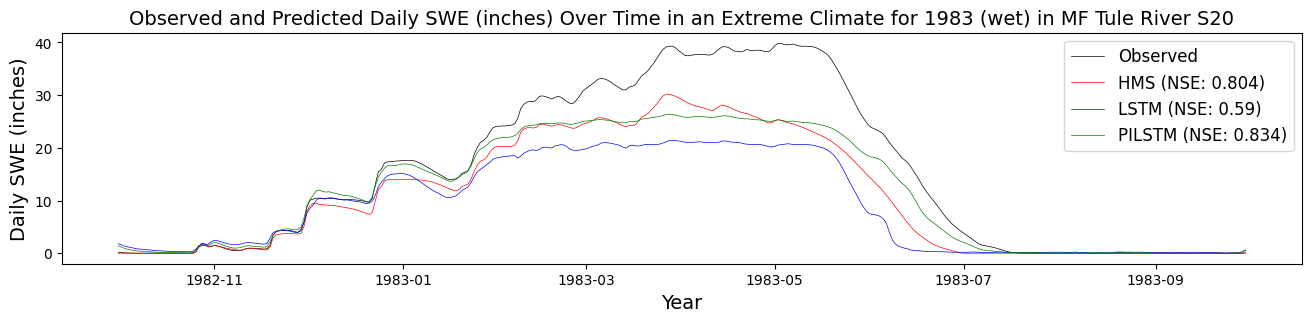

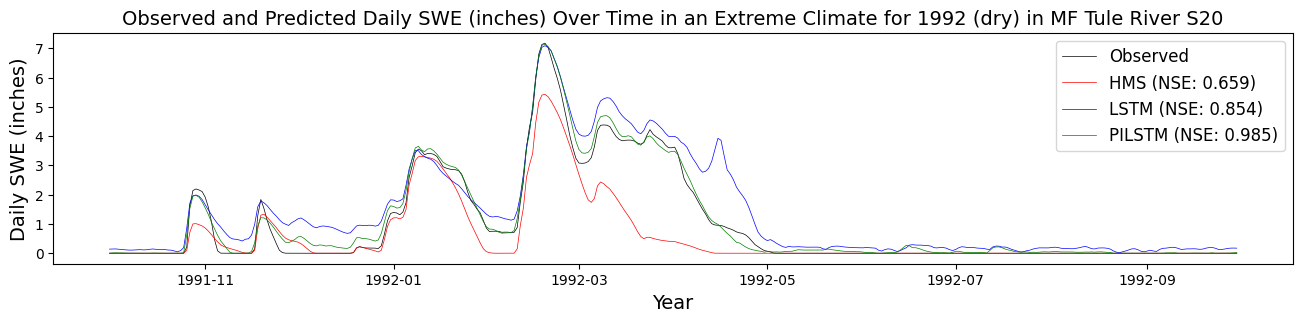

plots for nf
[1983, 1990]



/var/folders/93/12rdf89j3ql6h5j8b_3g9ddm0000gn/T/ipykernel_65045/2505024252.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['DateTime'] = pd.to_datetime(data['DateTime'])
/Users/evanrobert/anaconda3/envs/lstm/lib/python3.10/site-packages/neuralhydrology/evaluation/metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)
/Users/evanrobert/anaconda3/envs/lstm/lib/python3.10/site-packages/neuralhydrology/evaluation/metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)
/Users/evanrobert/anaconda3/envs/lstm/lib/python3.10/site-packages/neuralhydrology/evaluation/metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)


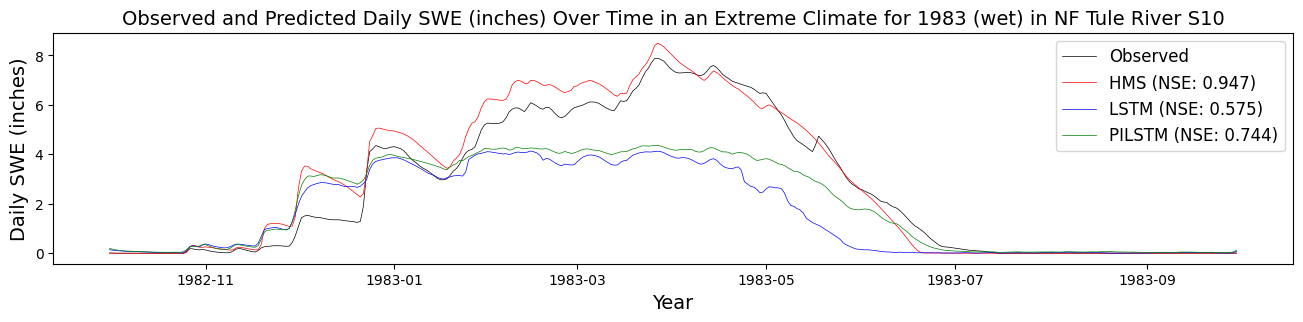

/Users/evanrobert/anaconda3/envs/lstm/lib/python3.10/site-packages/neuralhydrology/evaluation/metrics.py:412: RuntimeWarning: invalid value encountered in log
  qom_upper = np.log(obs[np.round(upper * len(obs)).astype(int)])
/Users/evanrobert/anaconda3/envs/lstm/lib/python3.10/site-packages/neuralhydrology/evaluation/metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)
/Users/evanrobert/anaconda3/envs/lstm/lib/python3.10/site-packages/neuralhydrology/evaluation/metrics.py:412: RuntimeWarning: invalid value encountered in log
  qom_upper = np.log(obs[np.round(upper * len(obs)).astype(int)])
/Users/evanrobert/anaconda3/envs/lstm/lib/python3.10/site-packages/neuralhydrology/evaluation/metrics.py:526: RuntimeWarning: invalid value encountered in log
  obs = np.log(obs)
/Users/evanrobert/anaconda3/envs/lstm/lib/python3.10/site-packages/neuralhydrology/evaluation/metrics.py:412: RuntimeWarning: invalid value encountered in log
  qom_upper = np.log(obs[np.round

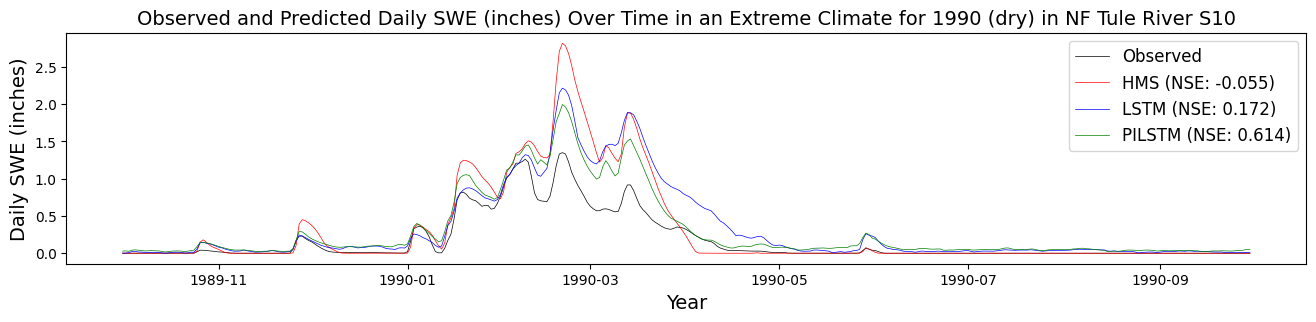

plots for sf
[1983, 1992]



/var/folders/93/12rdf89j3ql6h5j8b_3g9ddm0000gn/T/ipykernel_65045/2505024252.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['DateTime'] = pd.to_datetime(data['DateTime'])


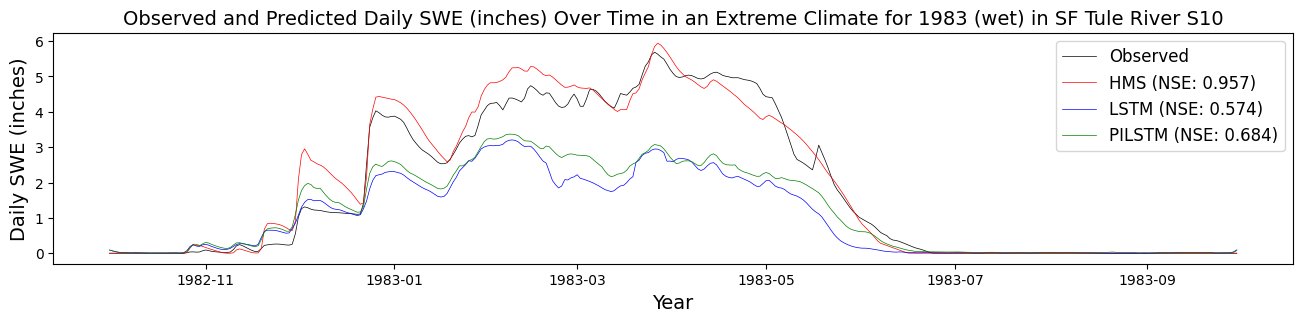

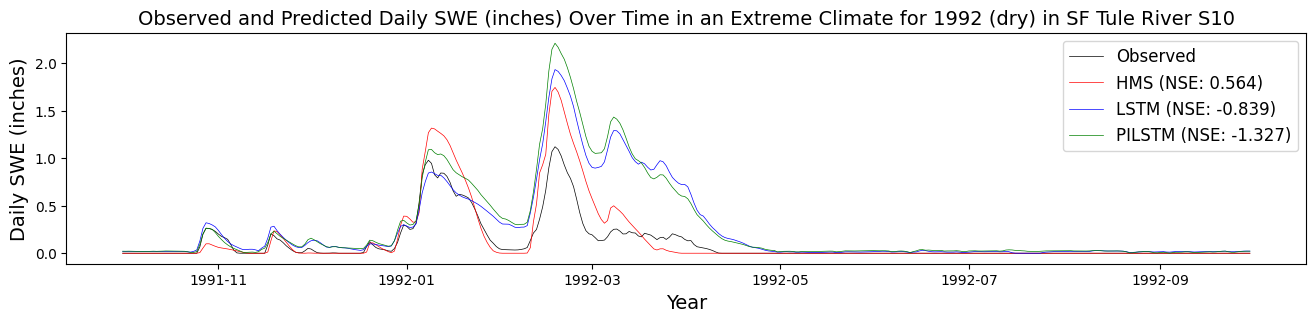

nse   perc_bias  alpha_nse  beta_nse  \
Basin             Wet/Dry Model                                                 
MF Tule River S20 Wet     HMS       0.804209  -29.040658   0.727685 -0.296412   
                          LSTM      0.589578  -40.360027   0.584447 -0.411946   
                          HMS_LSTM  0.833699  -23.039835   0.712866 -0.235163   
                  Dry     HMS       0.658906  -43.003587   0.698182 -0.264608   
                          LSTM      0.853618   39.947030   1.050856  0.245800   
                          HMS_LSTM  0.985073    8.383793   1.017527  0.051587   
NF Tule River S10 Wet     HMS       0.947412   10.755806   1.069530  0.102823   
                          LSTM      0.575123  -36.717979   0.618023 -0.351015   
                          HMS_LSTM  0.744495  -23.491454   0.660884 -0.224573   
                  Dry     HMS      -0.054640   71.252571   1.843233  0.387464   
                          LSTM      0.171910   86.637891   1.601209  0.471128   
                          HMS_LSTM  0.614345   69.223476   1.410860  0.376430   
SF Tule River S10 Wet     HMS       0.957187    7.195245   1.032918  0.066082   
                          LSTM      0.574232  -43.417452   0.540758 -0.398752   
                          HMS_LSTM  0.684300  -34.393870   0.592042 -0.315878   
                  Dry     HMS       0.563638   32.540986   1.538241  0.158383   
                          LSTM     -0.839317  134.951022   1.828861  0.656830   
                          HMS_LSTM -1.327024  156.966285   2.049078  0.763982   

                                           r  
Basin             Wet/Dry Model               
MF Tule River S20 Wet     HMS       0.976793  
                          LSTM      0.941793  
                          HMS_LSTM  0.979973  
                  Dry     HMS       0.871106  
                          LSTM      0.960328  
                          HMS_LSTM  0.994124  
NF Tule River S10 Wet     HMS       0.982618  
                          LSTM      0.873986  
                          HMS_LSTM  0.931854  
                  Dry     HMS       0.947519  
                          LSTM      0.923596  
                          HMS_LSTM  0.973368  
SF Tule River S10 Wet     HMS       0.981914  
                          LSTM      0.948348  
                          HMS_LSTM  0.958203  
                  Dry     HMS       0.960483  
                          LSTM      0.802915  
                          HMS_LSTM  0.843151

In [38]:
inflow_extremes = pd.read_csv('figures_for_usace_writeup/data/inflow_extremes_test.csv')
inflow_standard = pd.read_csv('figures_for_usace_writeup/data/inflow_standard_test.csv')
mf_tuler_swe_extremes = pd.read_csv('figures_for_usace_writeup/data/SWE_MF_Tuler_S20_Extreme_test_rerun_2.csv')
mf_tuler_swe_standard = pd.read_csv('figures_for_usace_writeup/data/MF_Tuler_S20_SWE_standard_test.csv')
nf_tuler_swe_extremes = pd.read_csv('figures_for_usace_writeup/data/SWE_NF_Tuler_S10_Extreme_test_rerun_2.csv')
nf_tuler_swe_standard = pd.read_csv('figures_for_usace_writeup/data/NF_Tuler_S10_SWE_standard_test.csv')
sf_tuler_swe_extremes = pd.read_csv('figures_for_usace_writeup/data/SWE_SF_Tuler_S10_Extreme_test_rerun_2.csv')
sf_tuler_swe_standard = pd.read_csv('figures_for_usace_writeup/data/SF_Tuler_S10_SWE_standard_test.csv')

nse, perc_bias, alpha_nse, beta_nse, r = [], [], [], [], []
print('plots for mf')
wet_dry_years_mf = [1983, 1992]
plt_wet_dry_years_extremes(mf_tuler_swe_extremes, wet_dry_years_mf, 'MF Tule River S20', nse, perc_bias, alpha_nse, beta_nse, r)
print('plots for nf')
wet_dry_years_nf = [1983, 1990]
plt_wet_dry_years_extremes(nf_tuler_swe_extremes, wet_dry_years_nf, 'NF Tule River S10', nse, perc_bias, alpha_nse, beta_nse, r)
print('plots for sf')
wet_dry_years_sf = [1983, 1992]
plt_wet_dry_years_extremes(sf_tuler_swe_extremes, wet_dry_years_sf, 'SF Tule River S10', nse, perc_bias, alpha_nse, beta_nse, r)

outer_index_names = ['MF Tule River S20', 'NF Tule River S10', 'SF Tule River S10']
middle_index_names = ['Wet', 'Dry']
inner_index_names = ['HMS', 'LSTM', 'HMS_LSTM']
data = np.ones(18) * -999

# Create MultiIndex
multi_index = pd.MultiIndex.from_product([outer_index_names, middle_index_names, inner_index_names], names=['Basin', 'Wet/Dry', 'Model'])
metrics = pd.DataFrame(data, index=multi_index, columns=['remove_this_column'])
metrics['nse'] = nse
metrics['perc_bias'] = perc_bias
metrics['perc_bias'] *= 100
metrics['alpha_nse'] = alpha_nse
metrics['beta_nse'] = beta_nse
metrics['r'] = r

metrics = metrics.drop('remove_this_column', axis=1)

directory = './figures_for_usace_writeup/metrics1/wettest_driest_extremes/SWE/'
file_path = os.path.join(directory, 'swe_wettest_driest.csv')
os.makedirs(directory, exist_ok=True)
metrics.to_csv(file_path)
metrics

#### inflow

In [178]:
def plt_wet_dry_years_extremes(data: pd.DataFrame, selected_years: int, basin_name: str, nse: list, perc_bias: list, alpha_nse:list, beta_nse:list, r:list, fhv, fms, flv):
        
    ######################### PROCESS DATA #########################
    
    data['DateTime'] = pd.to_datetime(data['DateTime'])

    def water_year(date):
        year = date.year
        if date.month >= 10:  # Assuming water year starts in October
            return year + 1
        else:
            return year

    data['WaterYear'] = data['DateTime'].apply(water_year)

    # '''!!!!!!!!!!!'''
    # #IMPORTANT!!!! MAKE SURE THIS FILTERING IS CORRECT!!!!! the date cutoff of the test years
    # data = data[data['WaterYear'] >= test_cutof_year]
    # data_no_dt = data.drop(columns=['DateTime'])
    # # Group by WaterYear and sum the values
    # water_year_sums = data_no_dt.groupby('WaterYear').sum().reset_index()
    # # Sort by the observed values
    # sorted_water_year_sums = water_year_sums.sort_values(by='Observed', ascending=False)
    # # Get the 2 wettest years
    # wettest_years = sorted_water_year_sums.head(2)['WaterYear']
    # # Get the 2 driest years
    # driest_years = sorted_water_year_sums.tail(2)['WaterYear']
    # # Combine wettest and driest years
    # selected_years = pd.concat([wettest_years, driest_years])
    # print(selected_years)
    # # Filter the original DataFrame to include only the selected years
    filtered_df = data[data['WaterYear'].isin(selected_years)]
    # Plotting the data for the selected years
    for i, year in enumerate(selected_years):
        
        data_swe_standard_year = filtered_df[filtered_df['WaterYear'] == year].copy()
        data_swe_standard_year['DateTime'] = pd.to_datetime(data_swe_standard_year['DateTime'])

        fig, ax = plt.subplots(figsize=(16, 3))

        dates = data_swe_standard_year['DateTime']
        obs = data_swe_standard_year['Observed']
        hms = data_swe_standard_year['HMS']
        lstm = data_swe_standard_year['LSTM']
        lstm_hms = data_swe_standard_year['LSTM_HMS']

        ######################### CALCULATE METRICS #########################

        hms_metrics = calculate_metrics(obs.to_xarray(), hms.to_xarray(), desired_metrics)
        lstm_metrics = calculate_metrics(obs.to_xarray(), lstm.to_xarray(), desired_metrics)
        lstm_hms_metrics = calculate_metrics(obs.to_xarray(), lstm_hms.to_xarray(), desired_metrics)

        nse += [hms_metrics['NSE'], lstm_metrics["NSE"], lstm_hms_metrics["NSE"]]
        perc_bias += [hms_metrics['percent_bias'], lstm_metrics["percent_bias"], lstm_hms_metrics["percent_bias"]]
        alpha_nse += [hms_metrics['Alpha-NSE'], lstm_metrics["Alpha-NSE"], lstm_hms_metrics["Alpha-NSE"]]
        beta_nse += [hms_metrics['Beta-NSE'], lstm_metrics["Beta-NSE"], lstm_hms_metrics["Beta-NSE"]]
        r += [hms_metrics['Pearson-r'], lstm_metrics["Pearson-r"], lstm_hms_metrics["Pearson-r"]]
        fhv += [hms_metrics['FHV'], lstm_metrics["FHV"], lstm_hms_metrics["FHV"]]
        fms += [hms_metrics['FMS'], lstm_metrics["FMS"], lstm_hms_metrics["FMS"]]
        flv += [hms_metrics['FLV'], lstm_metrics["FLV"], lstm_hms_metrics["FLV"]]
        
        ######################### PLOTTING #########################

        ax.plot(dates, obs, linewidth=0.5, label='Observed', color='black')
        ax.plot(dates, hms, linewidth=0.5, label=f'HMS (NSE: {round(hms_metrics["NSE"], 3)})', color='red')
        ax.plot(dates, lstm, linewidth=0.5, label=f'LSTM (NSE: {round(lstm_metrics["NSE"], 3)})', color='blue')
        ax.plot(dates, lstm_hms, linewidth=0.5, label=f'PILSTM (NSE: {round(lstm_hms_metrics["NSE"], 3)})', color='green')

        ax.set_xlabel("Year", fontsize=14)
        ax.set_ylabel("Daily Inflow (cfs)", fontsize=14)

        wet = 'dry' if i > 0 else 'wet'

        title = f'Observed and Predicted Daily Inflow (cfs) Over Time in an Extreme Climate for {year} ({wet})'
        plt.title(title, fontsize=14)
        plt.legend(fontsize=12, loc='upper right');

        directory = './figures_for_usace_writeup/figures1/wettest_driest_extremes/inflow/'
        file_path = os.path.join(directory, title + '.png')
        os.makedirs(directory, exist_ok=True)
        plt.savefig(file_path, bbox_inches='tight')
        plt.show()

    return nse, perc_bias, alpha_nse, beta_nse, r, fhv, fms, flv


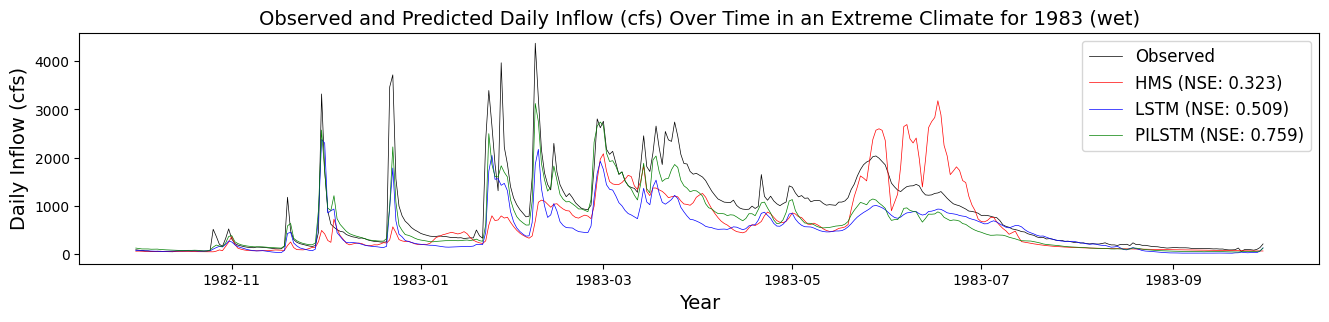

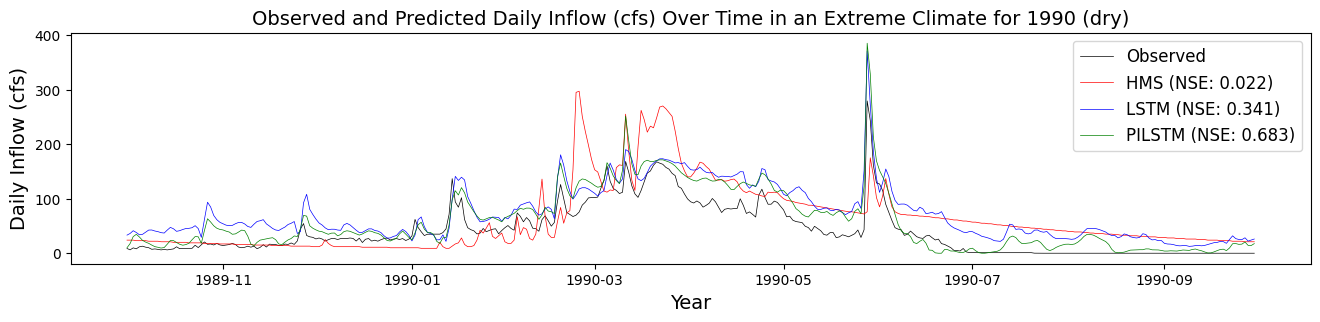

nse  perc_bias  alpha_nse  beta_nse         r  \
Wet/Dry Model                                                          
Wet     HMS       0.322782 -27.439252   0.830351 -0.297588  0.662866   
        LSTM      0.509196 -41.675089   0.567439 -0.451980  0.912405   
        HMS_LSTM  0.759222 -25.948398   0.758145 -0.281419  0.932013   
Dry     HMS       0.022041  50.867140   1.329323  0.458243  0.751934   
        LSTM      0.341017  77.959431   1.078435  0.702307  0.926006   
        HMS_LSTM  0.683114  44.159484   1.237569  0.397816  0.958714   

                        fhv        fms         flv  
Wet/Dry Model                                       
Wet     HMS      -23.018311  15.268213   45.028610  
        LSTM     -43.159801  -7.584874  -22.327206  
        HMS_LSTM -25.400754  -2.964667   15.341985  
Dry     HMS       42.041240 -30.223441   91.162785  
        LSTM      15.698768 -50.239094   85.113836  
        HMS_LSTM  28.097351 -18.941954 -193.913244

In [179]:
inflow_extremes = pd.read_csv('figures_for_usace_writeup/data/inflow_extremes_test.csv')

desired_years = [1983 ,1990]

nse, perc_bias, alpha_nse, beta_nse, r, fhv, fms, flv = [], [], [], [], [], [], [], []
nse, perc_bias, alpha_nse, beta_nse, r, fhv, fms, flv = plt_wet_dry_years_extremes(inflow_extremes, desired_years, None, nse, perc_bias, alpha_nse, beta_nse, r, fhv, fms, flv)

middle_index_names = ['Wet', 'Dry']
inner_index_names = ['HMS', 'LSTM', 'HMS_LSTM']
data = np.ones(6) * -999

# Create MultiIndex
multi_index = pd.MultiIndex.from_product([middle_index_names, inner_index_names], names=['Wet/Dry', 'Model'])
metrics = pd.DataFrame(data, index=multi_index, columns=['remove_this_column'])
metrics['nse'] = nse
metrics['perc_bias'] = perc_bias
metrics['perc_bias'] *= 100
metrics['alpha_nse'] = alpha_nse
metrics['beta_nse'] = beta_nse
metrics['r'] = r
metrics['fhv'] = fhv
metrics['fms'] = fms
metrics['flv'] = flv

metrics = metrics.drop('remove_this_column', axis=1)

directory = './figures_for_usace_writeup/metrics1/wettest_driest_extremes/inflow/'
file_path = os.path.join(directory, 'inflow_wettest_driest.csv')
os.makedirs(directory, exist_ok=True)

metrics.to_csv(file_path)
metrics

### find wettest/driest year per basin

In [35]:
print('mf')
mf_tuler_swe_extremes = pd.read_csv('figures_for_usace_writeup/data/SWE_MF_Tuler_S20_Extreme_test_rerun_2.csv')
data = mf_tuler_swe_extremes
swe_extremes_years_wet = [1983, 1993, 1995, 1998]
swe_extremes_years_dry = [1990, 1992, 2002, 2003]

data['DateTime'] = pd.to_datetime(data['DateTime'])

def water_year(date):
    year = date.year
    if date.month >= 10:  # Assuming water year starts in October
        return year + 1
    else:
        return year

data['WaterYear'] = data['DateTime'].apply(water_year)

wet_years_data = data[data['WaterYear'].isin(swe_extremes_years_wet)]
wet_year_sums = wet_years_data.groupby('WaterYear')['Observed'].sum()
wettest_year = wet_year_sums.idxmax()
print(f'wettest year: {wettest_year}')

wet_years_data = data[data['WaterYear'].isin(swe_extremes_years_dry)]
wet_year_sums = wet_years_data.groupby('WaterYear')['Observed'].sum()
wettest_year = wet_year_sums.idxmin()
print(f'driest year: {wettest_year}')

print('nf')
nf_tuler_swe_extremes = pd.read_csv('figures_for_usace_writeup/data/SWE_NF_Tuler_S10_Extreme_test_rerun_2.csv')
data = nf_tuler_swe_extremes
swe_extremes_years_wet = [1983, 1993, 1995, 1998]
swe_extremes_years_dry = [1990, 1992, 2002, 2003]

data['DateTime'] = pd.to_datetime(data['DateTime'])

def water_year(date):
    year = date.year
    if date.month >= 10:  # Assuming water year starts in October
        return year + 1
    else:
        return year

data['WaterYear'] = data['DateTime'].apply(water_year)

wet_years_data = data[data['WaterYear'].isin(swe_extremes_years_wet)]
wet_year_sums = wet_years_data.groupby('WaterYear')['Observed'].sum()
wettest_year = wet_year_sums.idxmax()
print(f'wettest year: {wettest_year}')

wet_years_data = data[data['WaterYear'].isin(swe_extremes_years_dry)]
wet_year_sums = wet_years_data.groupby('WaterYear')['Observed'].sum()
wettest_year = wet_year_sums.idxmin()
print(f'driest year: {wettest_year}')

print('sf')
sf_tuler_swe_extremes = pd.read_csv('figures_for_usace_writeup/data/SWE_SF_Tuler_S10_Extreme_test_rerun_2.csv')
data = sf_tuler_swe_extremes
swe_extremes_years_wet = [1983, 1993, 1995, 1998]
swe_extremes_years_dry = [1990, 1992, 2002, 2003]

data['DateTime'] = pd.to_datetime(data['DateTime'])

def water_year(date):
    year = date.year
    if date.month >= 10:  # Assuming water year starts in October
        return year + 1
    else:
        return year

data['WaterYear'] = data['DateTime'].apply(water_year)

wet_years_data = data[data['WaterYear'].isin(swe_extremes_years_wet)]
wet_year_sums = wet_years_data.groupby('WaterYear')['Observed'].sum()
wettest_year = wet_year_sums.idxmax()
print(f'wettest year: {wettest_year}')

wet_years_data = data[data['WaterYear'].isin(swe_extremes_years_dry)]
wet_year_sums = wet_years_data.groupby('WaterYear')['Observed'].sum()
wettest_year = wet_year_sums.idxmin()
print(f'driest year: {wettest_year}')


mf


/var/folders/93/12rdf89j3ql6h5j8b_3g9ddm0000gn/T/ipykernel_65045/1240961701.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['DateTime'] = pd.to_datetime(data['DateTime'])


wettest year: 1983
driest year: 1992
nf


/var/folders/93/12rdf89j3ql6h5j8b_3g9ddm0000gn/T/ipykernel_65045/1240961701.py:34: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['DateTime'] = pd.to_datetime(data['DateTime'])


wettest year: 1983
driest year: 1990
sf


/var/folders/93/12rdf89j3ql6h5j8b_3g9ddm0000gn/T/ipykernel_65045/1240961701.py:61: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['DateTime'] = pd.to_datetime(data['DateTime'])


wettest year: 1983
driest year: 1992
